# Classification Models

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV


#### Reading the Data

In [4]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [5]:
df.columns.values

array(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday',
       ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend',
       ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity',

Looking at the columns above, it is noticed that most of the features' names begin with a space. Due to the inconvenince, we will fix the features' names by removing these spaces.

In [6]:
df.columns = df.columns.str.lstrip()
df.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive

Looking at the attributes, we can deduce that the attributes url and timedelta are irrelevant features for our scope so they will be dropped. And it was approved by the domain experts who developed the dataset that these attributes are irrelevant.

In [7]:
df.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [8]:
df.dtypes

url                              object
timedelta                       float64
n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
                                 ...   
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                            int64
Length: 61, dtype: object

In [9]:
df.drop(columns=['url', 'timedelta'], inplace = True)

In [10]:
df.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

The rest of the data seem to be relevant so nothing needs to be dropped for now. With feature selection, the important features will be highlighted, and it will be applied later after the data cleaning. 

## Checking Datatypes of the columns

In [11]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

The datatypes of the columns are all adjusted to the appropriate datatypes so there is no cleaning needed in this part. 

#### Grouping all Binary features so we can explore the normal distribution of the contiuous Features

In [12]:
temp = df.drop(['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'],axis = 1)

In [13]:
temp

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
0             0.0              4.680365  ...               0.100000   
1             0.0              4.913725  ...               0.033333   
2             0.0              4.393365  ...               0.100000   
3             0.0              4.404896  ...               0.136364   
4             0.0              4.682836  ...               0.033333   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.100000   
39640        48.0              4.405488  ...               0.136364   
39641         1.0              5.076923  ...               0.136364   
39642         0.0              4.975073  ...               0.062500   
39643         2.0              4.471338  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050

## Checking for Duplicate Values

In [14]:
df.duplicated().sum()

0

The dataset has no duplicates to be dropped.

## Checking for Outliers

There are too many features to plot in one box plot so we will group them int batches andd plot them together.

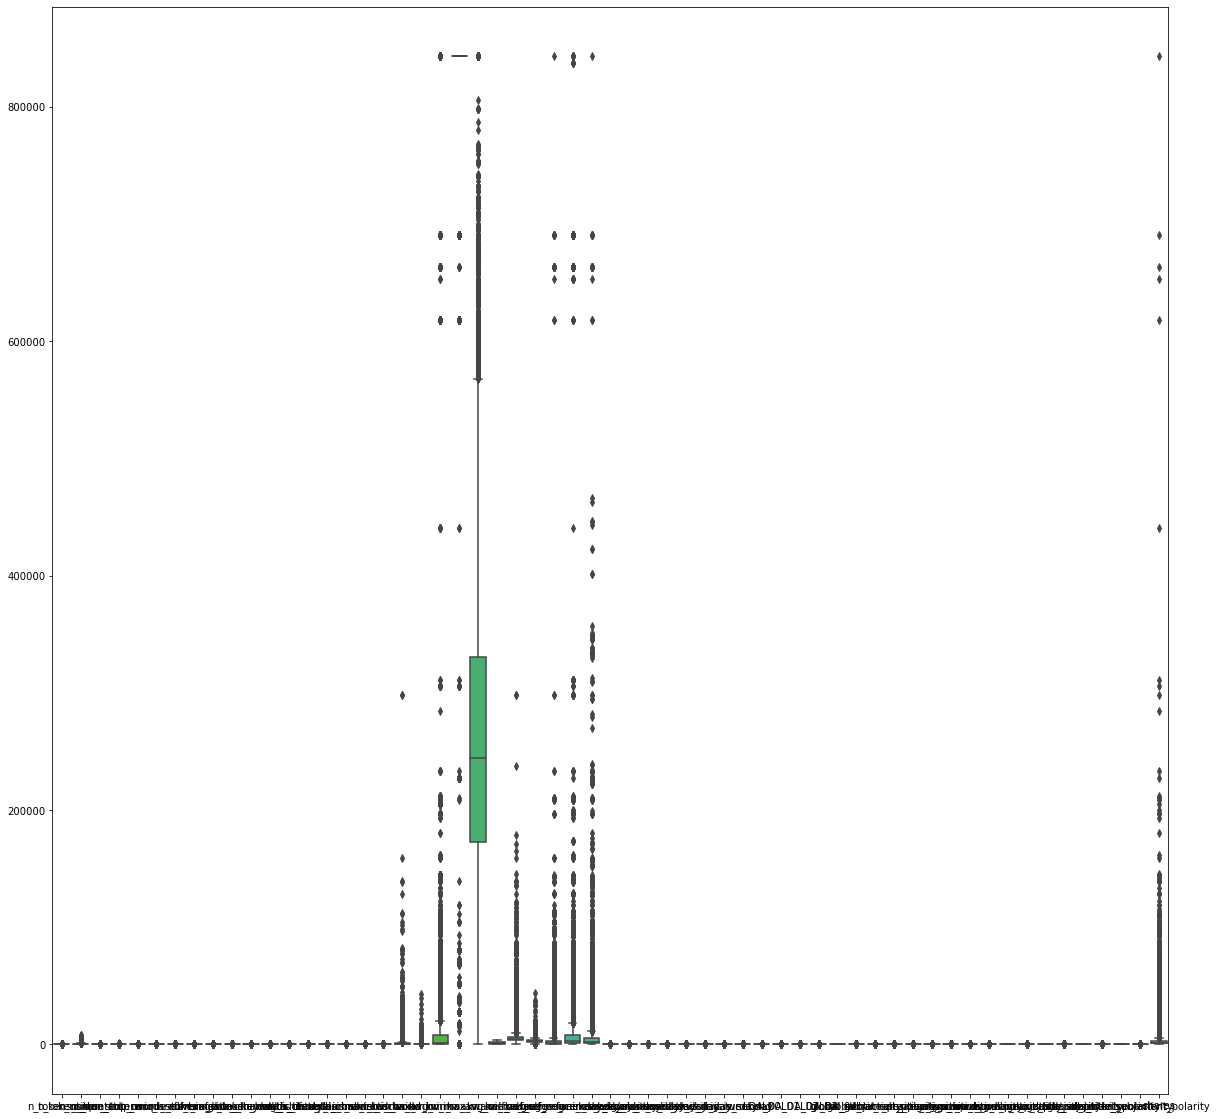

In [15]:
fig = plt.figure(figsize =(20, 20))
sns.boxplot(data = df)
plt.show()

We will look at the maximum and minimum value of the each feature so the close ranges can be plotted together.

In [13]:
for col in df:
    series = df[col]
    print(col, ': ','max: ', series.max(),", min: ", series.min())

n_tokens_title :  max:  23.0 , min:  2.0
n_tokens_content :  max:  8474.0 , min:  0.0
n_unique_tokens :  max:  701.0 , min:  0.0
n_non_stop_words :  max:  1042.0 , min:  0.0
n_non_stop_unique_tokens :  max:  650.0 , min:  0.0
num_hrefs :  max:  304.0 , min:  0.0
num_self_hrefs :  max:  116.0 , min:  0.0
num_imgs :  max:  128.0 , min:  0.0
num_videos :  max:  91.0 , min:  0.0
average_token_length :  max:  8.04153354633 , min:  0.0
num_keywords :  max:  10.0 , min:  1.0
data_channel_is_lifestyle :  max:  1.0 , min:  0.0
data_channel_is_entertainment :  max:  1.0 , min:  0.0
data_channel_is_bus :  max:  1.0 , min:  0.0
data_channel_is_socmed :  max:  1.0 , min:  0.0
data_channel_is_tech :  max:  1.0 , min:  0.0
data_channel_is_world :  max:  1.0 , min:  0.0
kw_min_min :  max:  377.0 , min:  -1.0
kw_max_min :  max:  298400.0 , min:  0.0
kw_avg_min :  max:  42827.8571429 , min:  -1.0
kw_min_max :  max:  843300.0 , min:  0.0
kw_max_max :  max:  843300.0 , min:  0.0
kw_avg_max :  max:  843300

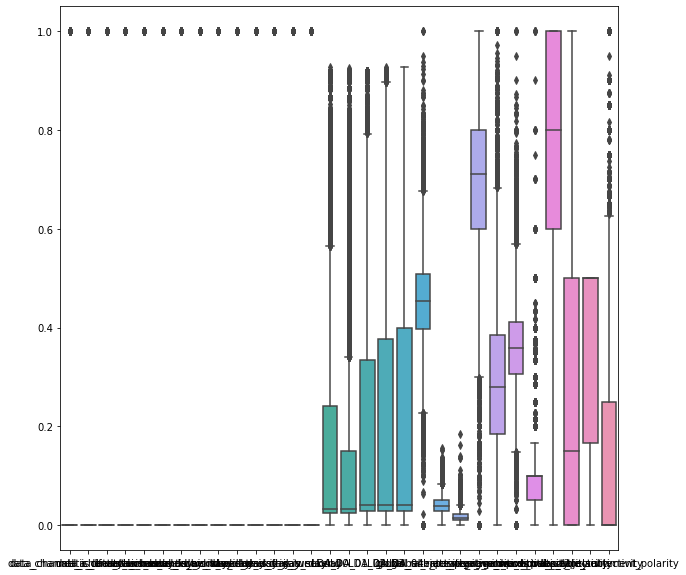

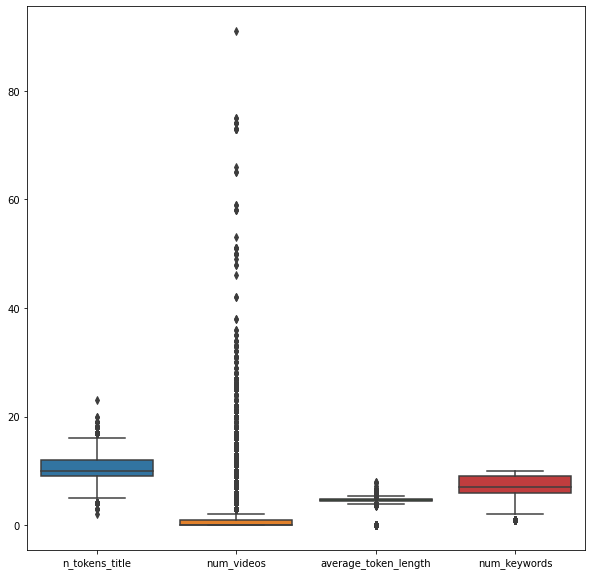

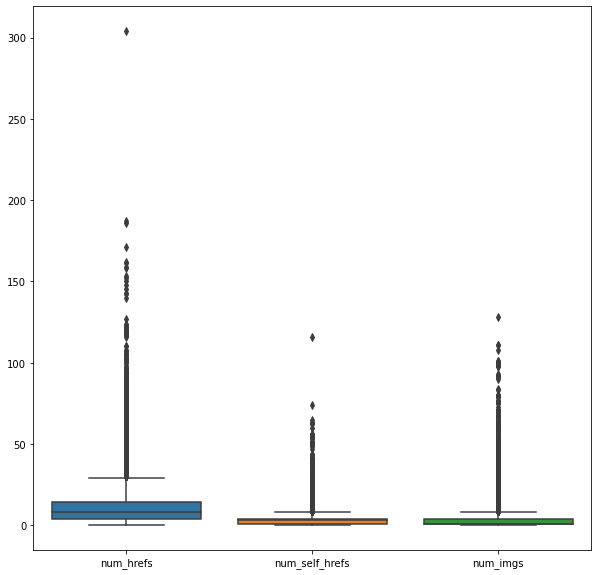

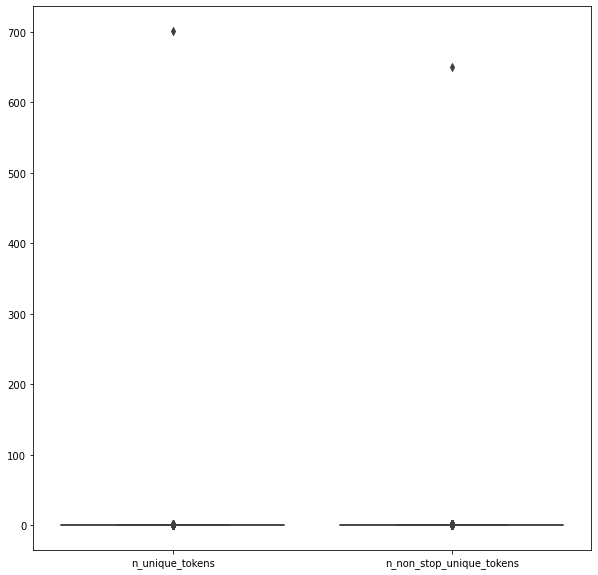

In [15]:
range0=[]
range1=[]
range2=[]
range3=[]
range4=[]
ranges=[]
for col in df:
    if df[col].min() >= 0 and df[col].max() <= 1:
        range0.append(col)
plotdf = df.drop(columns=range0)
for col in plotdf:
    if df[col].min() >= 0 and df[col].max() <= 100:
        range1.append(col)
    elif df[col].min() >= 0 and df[col].max() <= 500:
        range2.append(col)
    elif df[col].min() >= 0 and df[col].max() <= 1000:
        range3.append(col)
    elif df[col].min() >= -1 and df[col].max() <= 1:
        range4.append(col)
    ranges.append(range0)
    ranges.append(range1)
    ranges.append(range2)
    ranges.append(range3)
    ranges.append(range4)

for i in range(0,4):
    fig = plt.figure(figsize =(10, 10))
    sns.boxplot(data = df[ranges[i]])

We will briefly notice that there are way too many outliers for most of the attributes that are continuous not the categorical ones.

#### Looking at the Target Values

c:\Users\Farah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shares', ylabel='Density'>

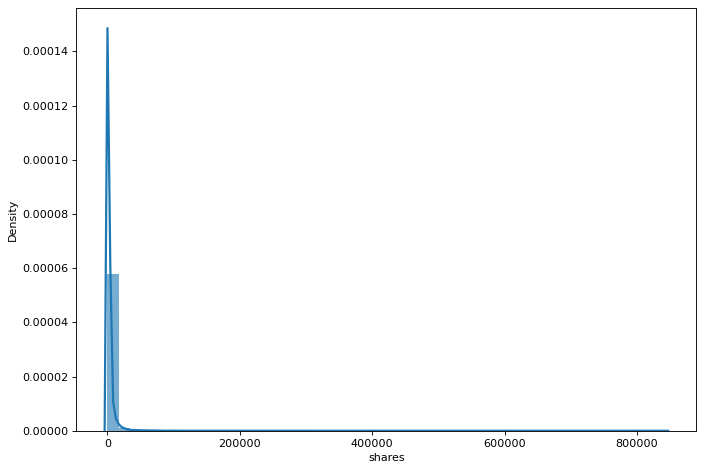

In [29]:
plt.figure(figsize=(10,7), dpi= 80)
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

sns.distplot(df['shares'], **kwargs)
#plt.show()

As seen in the above graph that the dta itself is askewed and mostly acculeated at one side. Therefore, we will be lokoing at the distribution of the non-categorical features.

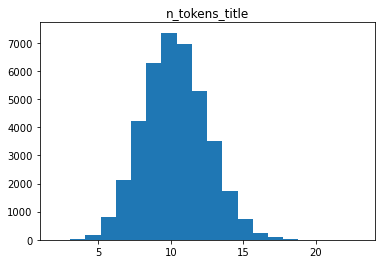

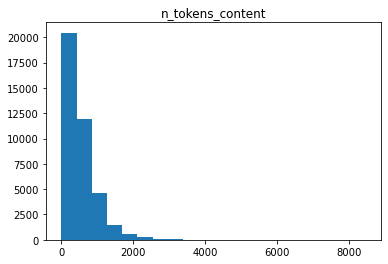

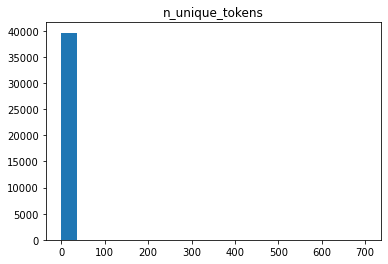

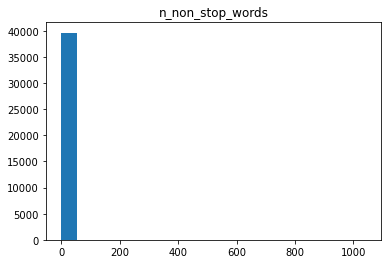

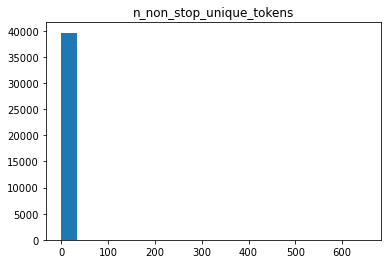

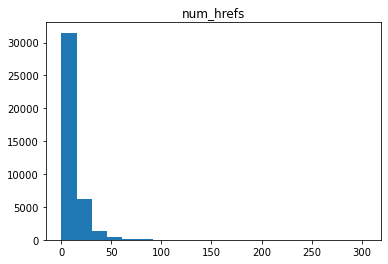

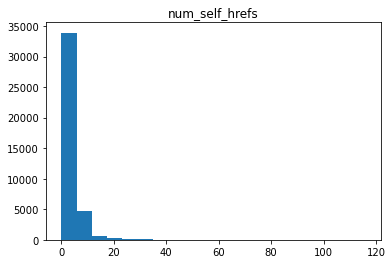

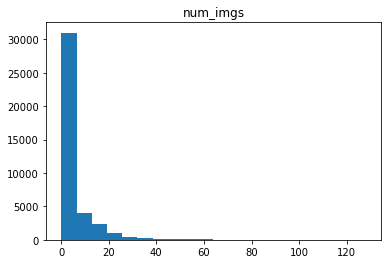

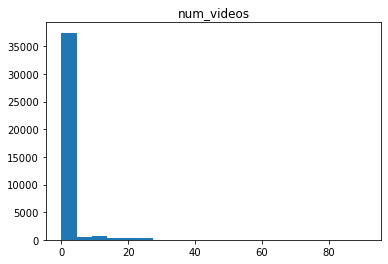

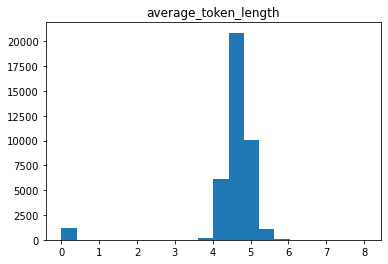

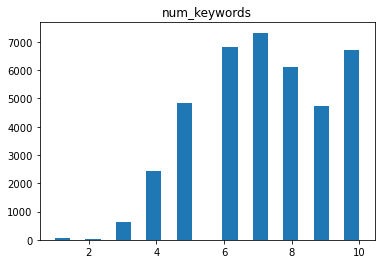

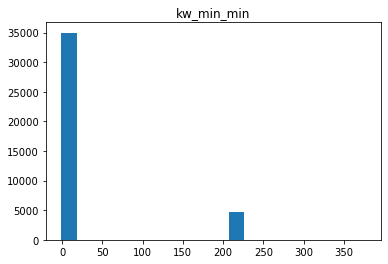

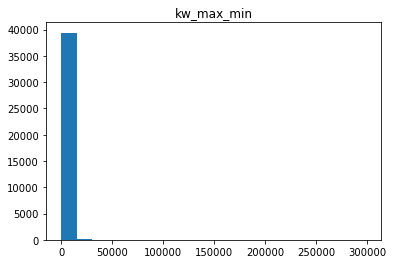

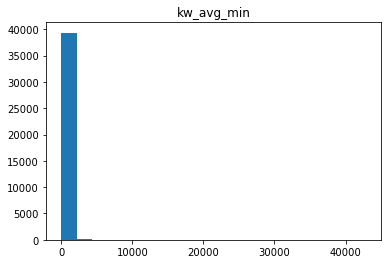

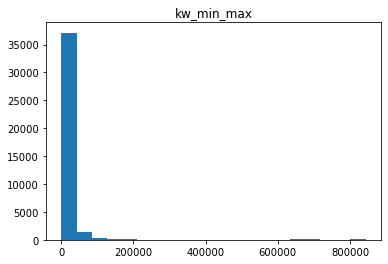

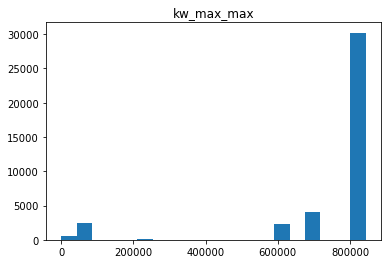

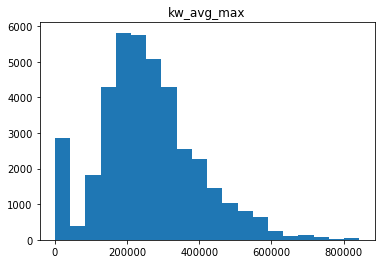

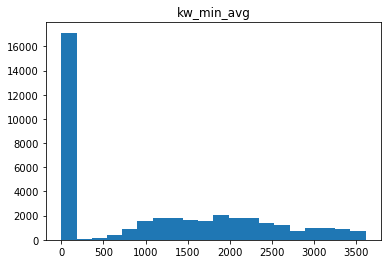

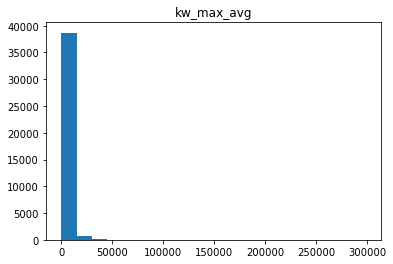

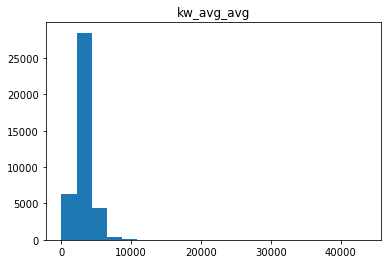

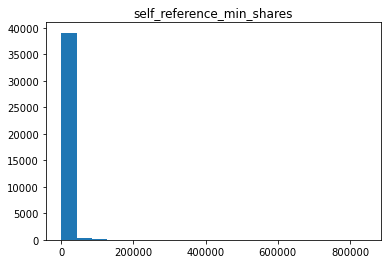

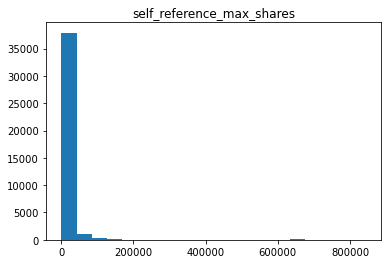

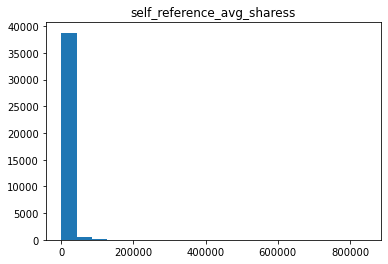

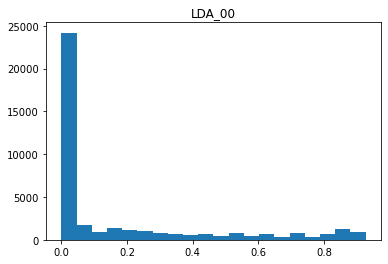

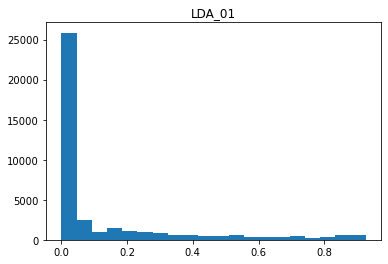

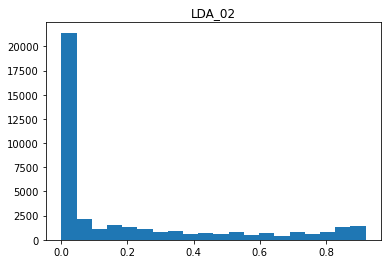

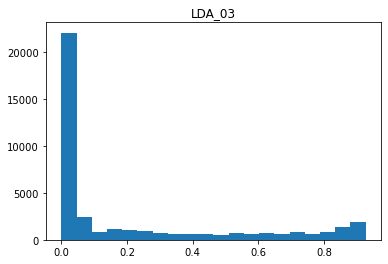

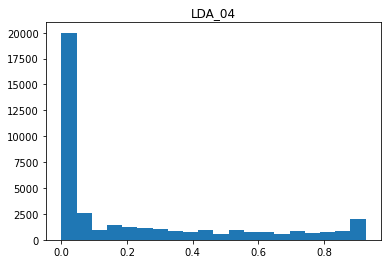

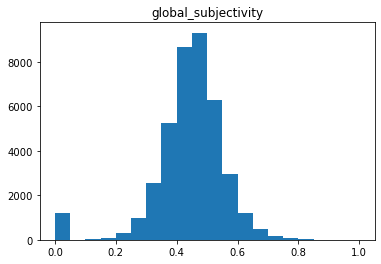

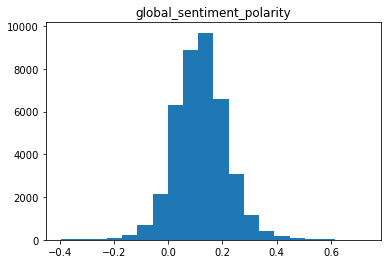

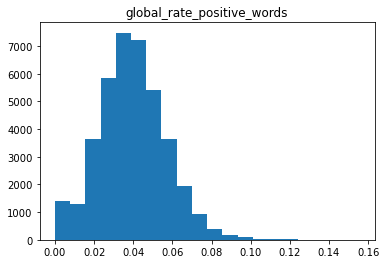

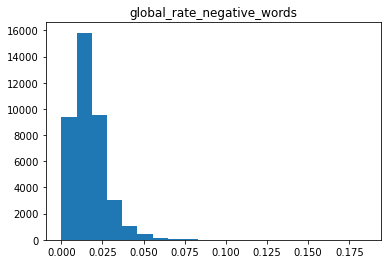

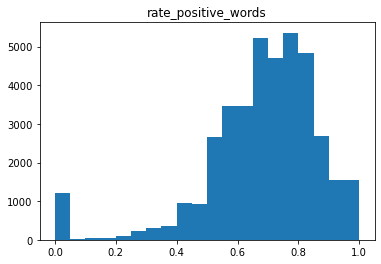

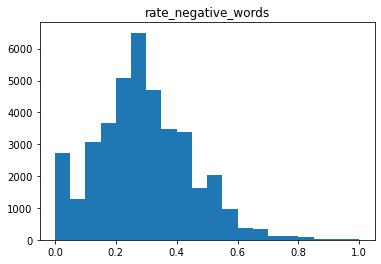

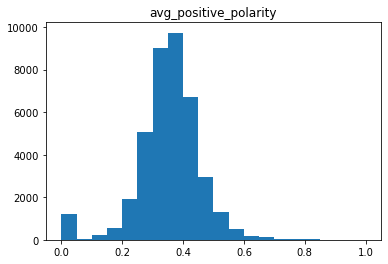

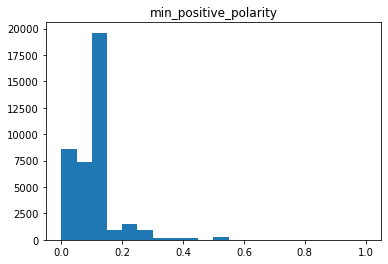

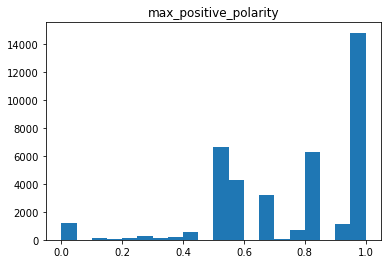

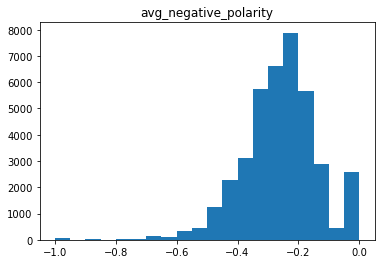

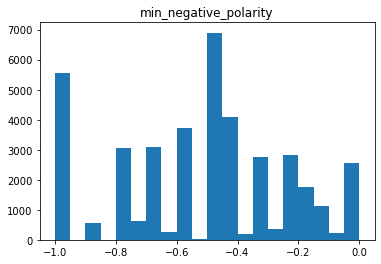

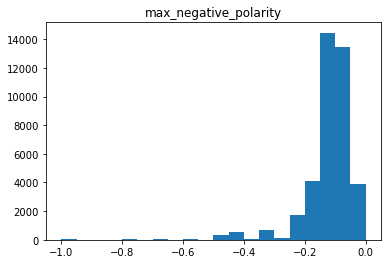

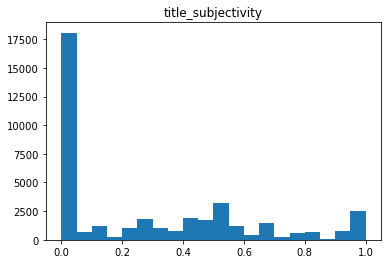

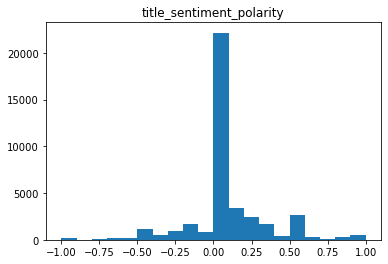

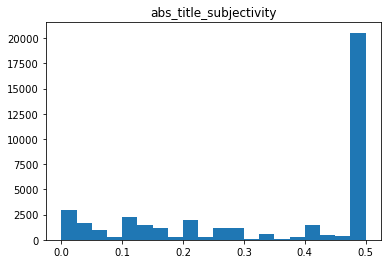

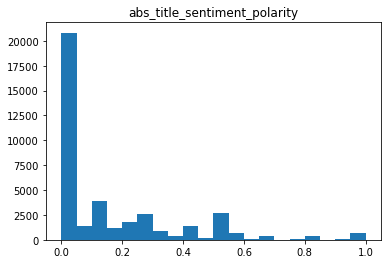

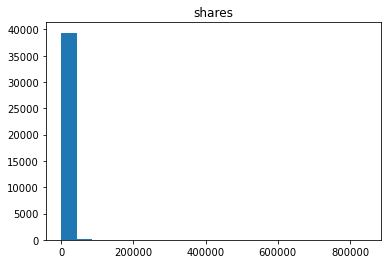

In [14]:
for i in range(0,45):
    plt.hist(temp[temp.columns[i]], bins=20)
    plt.title(temp.columns[i])
    plt.show()

As seen above, most of the features are not normally distributed and askewed, so we will perform transformation on it to try and distribute it normally.

### Normally Distributing the Data

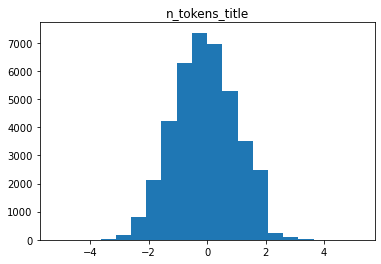

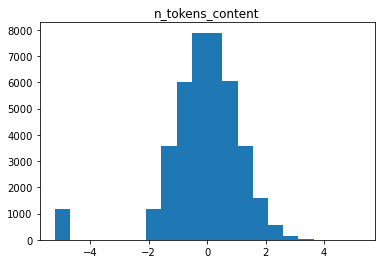

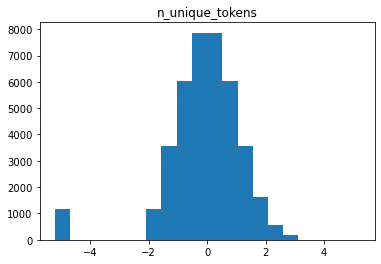

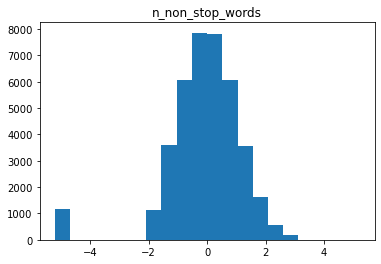

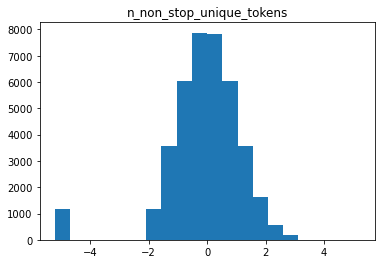

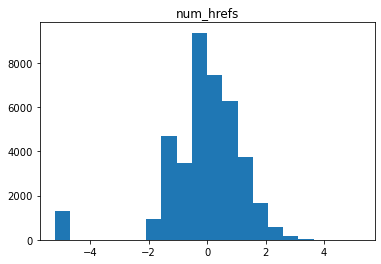

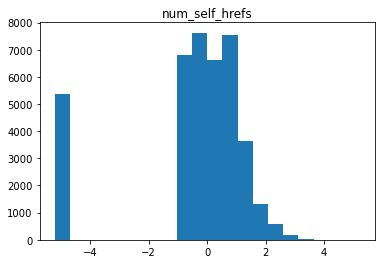

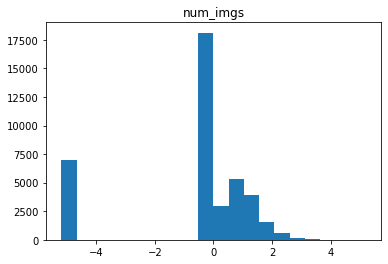

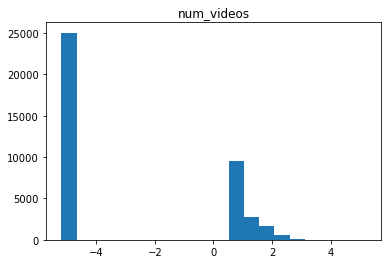

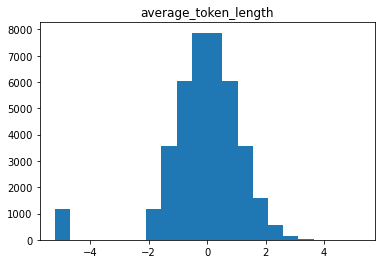

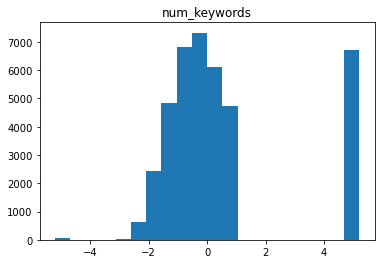

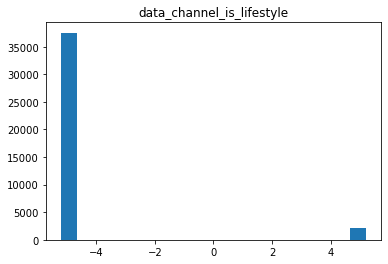

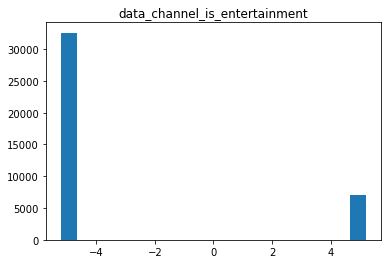

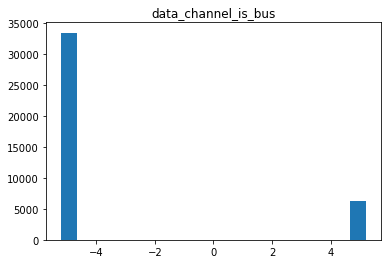

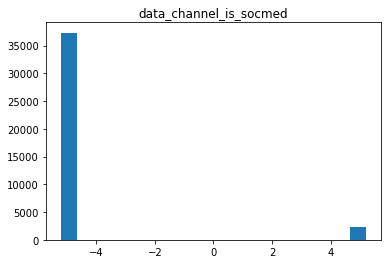

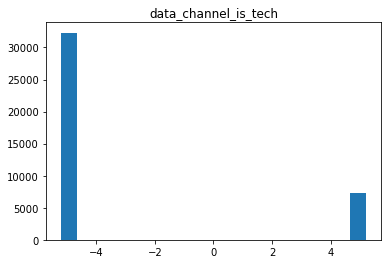

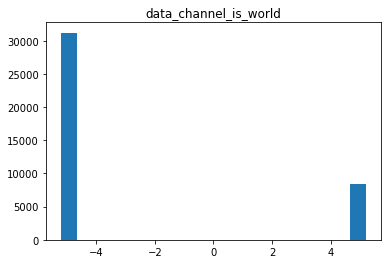

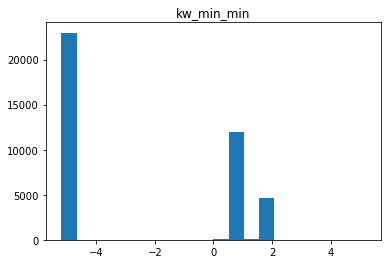

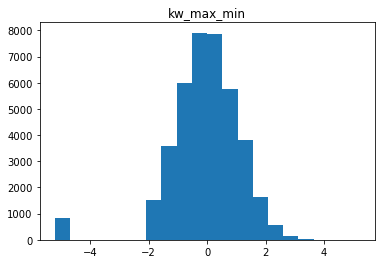

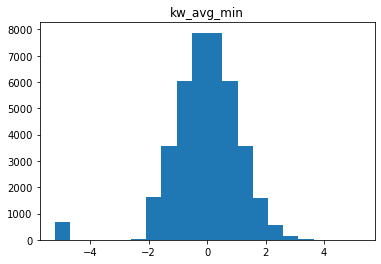

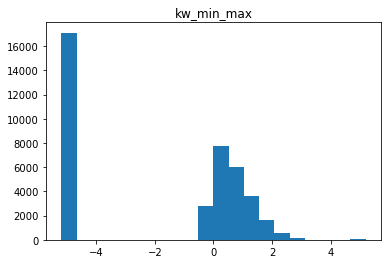

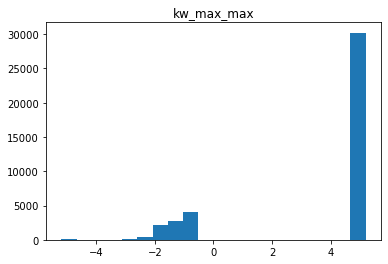

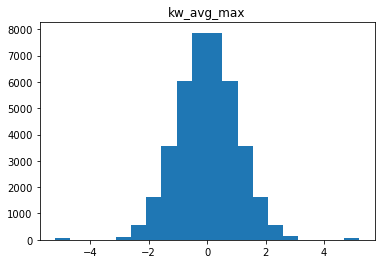

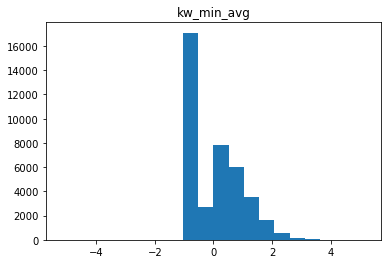

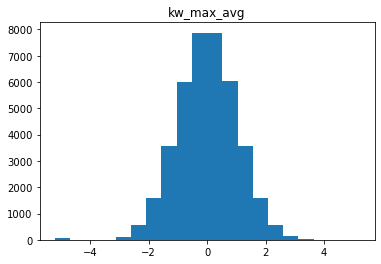

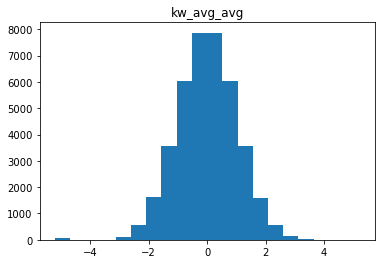

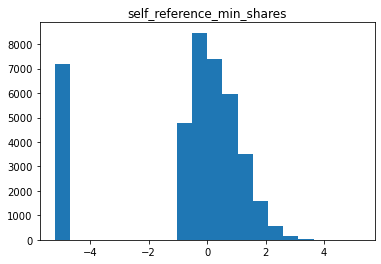

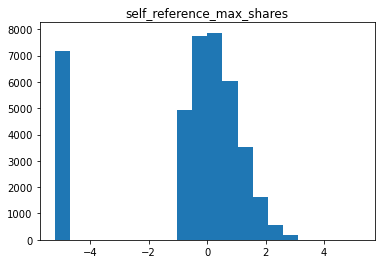

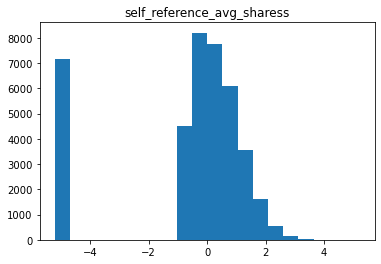

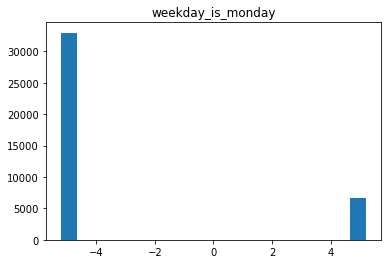

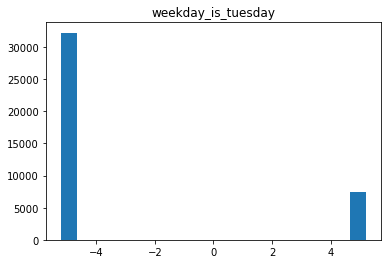

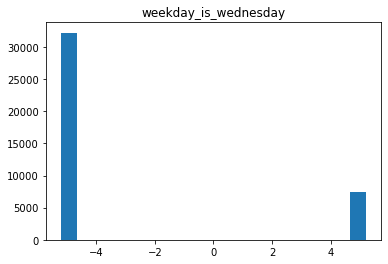

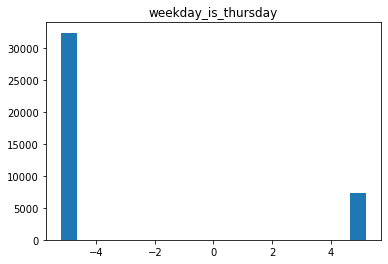

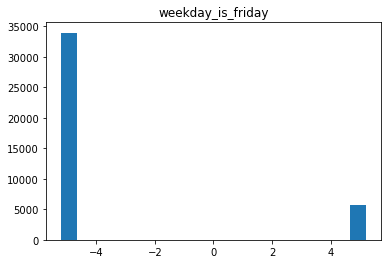

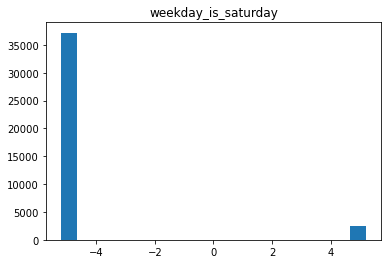

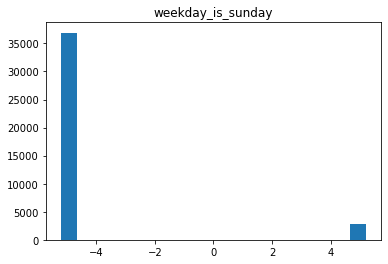

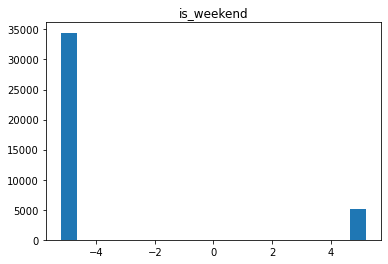

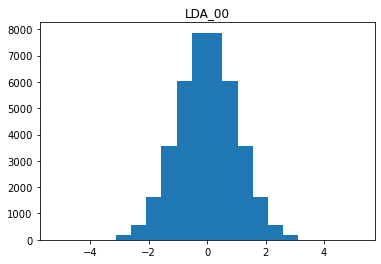

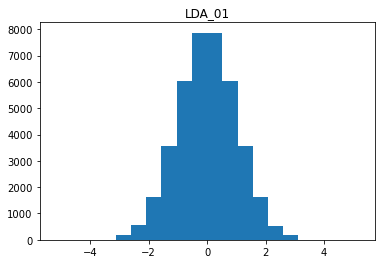

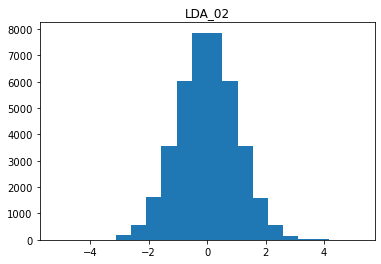

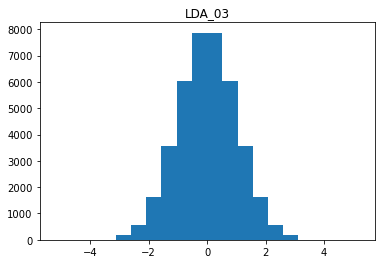

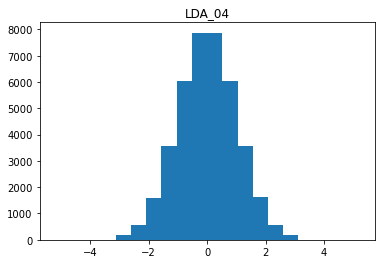

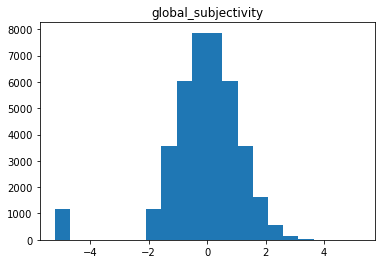

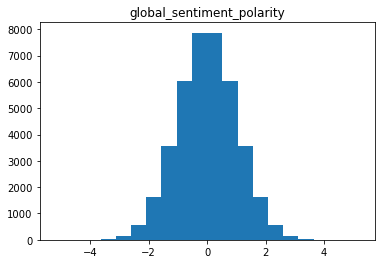

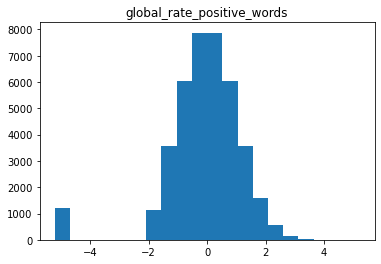

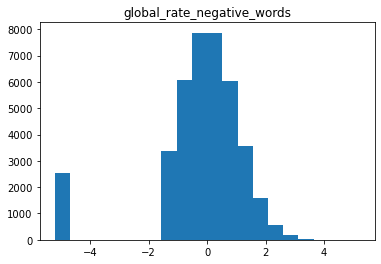

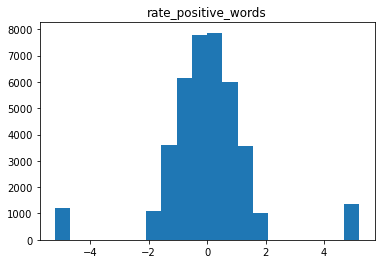

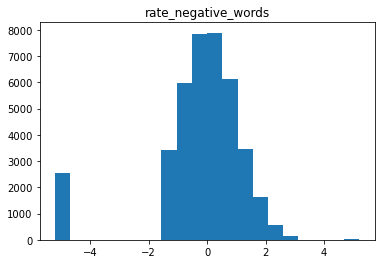

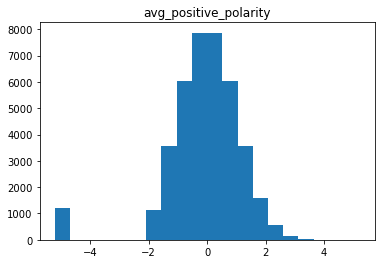

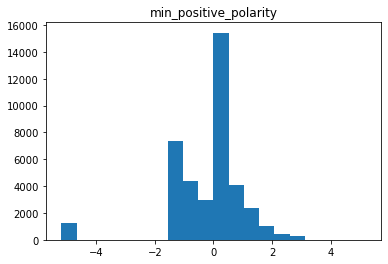

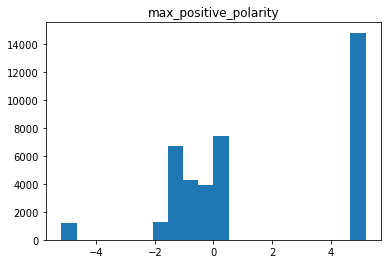

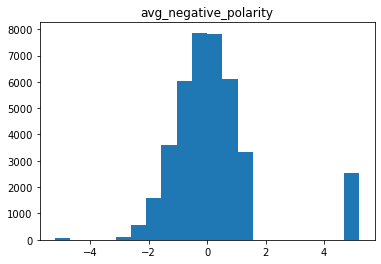

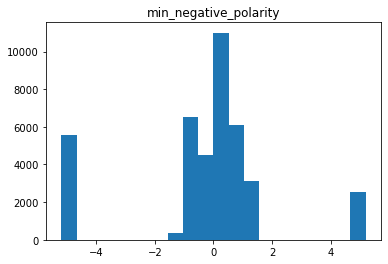

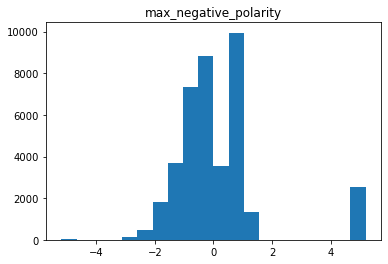

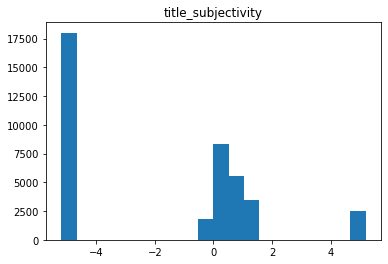

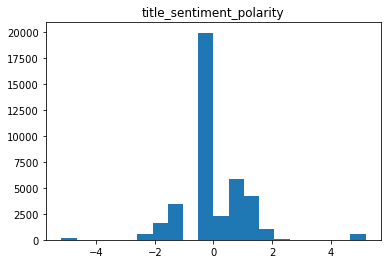

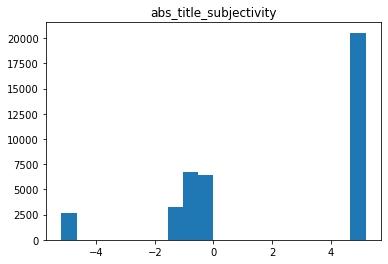

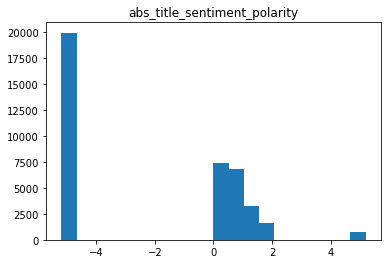

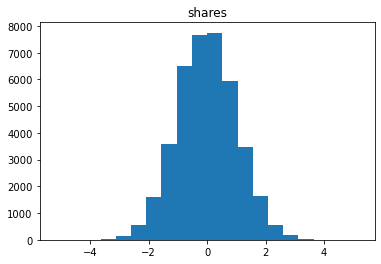

In [16]:
from sklearn.preprocessing import QuantileTransformer
cols = df.columns
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(df)

pt_data = quantile.transform(df)  

df_trans = pd.DataFrame(pt_data, columns=cols) 
for i in range(0,59):
    plt.hist(df_trans[df_trans.columns[i]], bins=20)
    plt.title(df_trans.columns[i])
    plt.show()

After performnig the distribution, it is seen that the data is slightly better and its distribution is adiquate.

From what we have seen from all the visualizations that we cannot consider that was seen in the box plot as outliers since they represent most of the data and as seen in the histogram the data itself is askewed.

### Failed attempt of Using Quantile Method to Trim outliers

We will give an attempt of trying to trim some of the outliers if any, but as following the steps it did not work well. So, it proves that we will need all of the data.

As seen in the shares graph, most of the data is skewed and most of it will be considered as outliers while they are in fact anomalies so we cannot trim any data. IQR method was applied but it trimmed around 90% of the data and the training models did not perform well on these data because they became accumulated in a narrow range of value, so the model did not learn much.

In [57]:
Q1 = df_trans.quantile(0.25)
Q3 = df_trans.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

n_tokens_title                   1.375075
n_tokens_content                 1.348980
n_unique_tokens                  1.349714
n_non_stop_words                 1.347405
n_non_stop_unique_tokens         1.348782
num_hrefs                        1.480280
num_self_hrefs                   1.363893
num_imgs                         0.908090
num_videos                       5.876192
average_token_length             1.348448
num_keywords                     1.302715
data_channel_is_lifestyle        0.000000
data_channel_is_entertainment    0.000000
data_channel_is_bus              0.000000
data_channel_is_socmed           0.000000
data_channel_is_tech             0.000000
data_channel_is_world            0.000000
kw_min_min                       5.818916
kw_max_min                       1.338016
kw_avg_min                       1.348854
kw_min_max                       5.876192
kw_max_max                       0.000000
kw_avg_max                       1.348978
kw_min_avg                       1

Calculating upper fence and lower fence

In [58]:
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print(upper_fence, lower_fence)

n_tokens_title                    2.808964
n_tokens_content                  2.697172
n_unique_tokens                   2.699796
n_non_stop_words                  2.694810
n_non_stop_unique_tokens          2.697459
num_hrefs                         2.927560
num_self_hrefs                    2.638284
num_imgs                          2.029555
num_videos                        9.491142
average_token_length              2.696882
num_keywords                      2.695460
data_channel_is_lifestyle        -5.199338
data_channel_is_entertainment    -5.199338
data_channel_is_bus              -5.199338
data_channel_is_socmed           -5.199338
data_channel_is_tech             -5.199338
data_channel_is_world            -5.199338
kw_min_min                        9.347952
kw_max_min                        2.668186
kw_avg_min                        2.698039
kw_min_max                        9.491142
kw_max_max                        5.199338
kw_avg_max                        2.698032
kw_min_avg 

In [59]:
temp_df = df_trans[((df_trans > upper_fence) | (df_trans < lower_fence)).any(axis=1)]
df_out = df_trans[~((df_trans > upper_fence) |(df_trans < lower_fence)).any(axis=1)]
df_out.shape, temp_df.shape

((0, 59), (39644, 59))

In [39]:
df_out

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
9397        -0.628724          0.056486         0.163615          0.082896   
9400         0.746351         -0.021329         0.194100         -0.015055   
9405        -1.620592         -0.681594         0.750352         -0.621099   
9409        -1.114032         -0.914679         1.043155         -0.748009   
9411         0.299230          0.288750        -0.430593          0.376283   
...               ...               ...              ...               ...   
39626        0.746351         -0.659602         0.270485         -0.773140   
39632        2.074445          0.419741        -0.320201          0.419741   
39635        1.192071          0.182083        -0.245280          0.151121   
39639        0.299230         -0.208505        -0.100362         -0.393847   
39641       -0.158740          0.091712        -0.222529          0.147316   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
9397                   0.264198   1.479004        1.873053 -0.240671   
9400                  -0.311196   1.046576       -0.248427 -0.240671   
9405                   0.758004   0.071571        0.908975 -0.240671   
9409                   0.734798  -0.087933        0.207223 -0.240671   
9411                  -0.762160  -0.087933        0.592444  1.059682   
...                         ...        ...             ...       ...   
39626                  0.608082  -0.773140       -0.248427 -0.240671   
39632                 -0.304482   0.783330       -0.248427  0.593940   
39635                 -0.513459   0.985610       -0.248427  0.441766   
39639                 -0.060349   0.207223        1.378114 -0.240671   
39641                 -0.491880   1.337127       -0.771450  1.159515   

       num_videos  average_token_length  ...  min_positive_polarity  \
9397    -5.199338              0.319149  ...               0.247134   
9400    -5.199338              0.338290  ...              -0.602943   
9405    -5.199338              0.368673  ...               0.247134   
9409    -5.199338              2.552569  ...              -0.602943   
9411    -5.199338              1.018515  ...              -0.602943   
...           ...                   ...  ...                    ...   
39626    0.676854             -1.246683  ...               1.008294   
39632   -5.199338              1.182885  ...               0.247134   
39635   -5.199338              0.797414  ...              -1.154615   
39639    0.676854             -0.507982  ...               0.247134   
39641    0.676854              1.414440  ...               1.008294   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
9397                0.025094              -0.249721               0.032625   
9400                0.025094              -0.383195              -0.308427   
9405               -1.044409              -0.773140               0.032625   
9409               -0.561327              -1.897783              -1.061884   
9411                0.025094              -0.453346              -0.308427   
...                      ...                    ...                    ...   
39626               5.199338               1.070745               1.169401   
39632               0.025094               1.324418               1.355761   
39635               5.199338               0.295709               0.393847   
39639              -0.176553              -0.056486               0.032625   
39641              -1.044409              -0.892802              -0.868016   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
9397               -0.605955           -5.199338                 -0.261387   
9400               -0.123259            0.046436                  0.506348   
9405               -0.605955           -5.199338                 -0.261387   
9409               -0.605955           -5.199338                 -0.261387   
9411                0.761

In [40]:
temp_df

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            0.746351         -0.830234         1.171981         -0.858910   
1           -0.628724         -0.630254         0.636387         -0.683178   
2           -0.628724         -0.877196         0.346214         -0.977487   
3           -0.628724          0.309743        -0.344154          0.321611   
4            1.192071          1.254089        -1.200982          1.406779   
...               ...               ...              ...               ...   
39637        1.192071          1.846188        -1.108062          1.832904   
39638        0.299230         -0.807429         1.082829         -0.839121   
39640        0.746351         -0.278302         1.441687         -0.472407   
39642       -2.156675          0.618059         0.002511          0.705530   
39643       -0.158740         -1.247505         1.490165         -1.301191   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      1.250349  -0.773140       -0.248427 -0.240671   
1                      1.038009  -1.081940       -0.771450 -0.240671   
2                     -0.283522  -1.081940       -0.771450 -0.240671   
3                     -0.264345   0.207223       -5.199338 -0.240671   
4                     -1.358599   1.046576        2.256745  1.629992   
...                         ...        ...             ...       ...   
39637                 -0.873252   0.783330        1.959536  0.756333   
39638                  1.348553  -0.504922        0.207223 -0.240671   
39640                  1.915150   0.207223        1.378114  0.593940   
39642                  0.023764   0.329548       -0.771450 -0.240671   
39643                  1.542130  -1.700222       -0.771450 -5.199338   

       num_videos  average_token_length  ...  min_positive_polarity  \
0       -5.199338              0.060753  ...               0.247134   
1       -5.199338              0.874214  ...              -1.154615   
2       -5.199338             -0.983327  ...               0.247134   
3       -5.199338             -0.946978  ...               1.008294   
4       -5.199338              0.069420  ...              -1.154615   
...           ...                   ...  ...                    ...   
39637   -5.199338             -0.400625  ...              -1.154615   
39638   -5.199338              0.909566  ...               1.716415   
39640    3.099208             -0.944644  ...               1.008294   
39642   -5.199338              1.082629  ...              -0.348150   
39643    1.269664             -0.700498  ...               0.247134   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                  -0.303168              -0.840906              -0.308427   
1                  -0.303168               1.304121               1.355761   
2                   5.199338              -1.639539              -0.868016   
3                   0.025094              -0.984987              -0.308427   
4                   5.199338               0.327612               0.032625   
...                      ...                    ...                    ...   
39637               5.199338              -1.414296              -5.199338   
39638               0.025094               0.036391               0.849874   
39640              -0.303168               0.417002               0.393847   
39642              -1.044409               0.476092               0.032625   
39643              -1.044409               0.532190               0.989697   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -1.418119            0.680013                 -1.387908   
1                  -0.123259           -5.199338                 -0.261387   
2                  -0.837338           -5.199338                 -0.261387   
3                  -1.114032           -5.199338                 -0.261387   
4                   0.761

In [48]:
new_df = df.drop(temp_df.index)
new_df

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
9397              9.0             429.0         0.556355               1.0   
9400             12.0             402.0         0.559459               1.0   
9405              7.0             245.0         0.616667               1.0   
9409              8.0             205.0         0.648780               1.0   
9411             11.0             522.0         0.495183               1.0   
...               ...               ...              ...               ...   
39626            12.0             249.0         0.567227               1.0   
39632            15.0             580.0         0.506261               1.0   
39635            13.0             478.0         0.514039               1.0   
39639            11.0             346.0         0.529052               1.0   
39641            10.0             442.0         0.516355               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
9397                   0.714286       27.0            11.0       1.0   
9400                   0.661224       19.0             2.0       1.0   
9405                   0.762821        8.0             5.0       1.0   
9409                   0.760563        7.0             3.0       1.0   
9411                   0.617211        7.0             4.0      11.0   
...                         ...        ...             ...       ...   
39626                  0.748201        4.0             2.0       1.0   
39632                  0.661891       15.0             2.0       3.0   
39635                  0.641844       18.0             2.0       2.0   
39639                  0.684783        9.0             7.0       1.0   
39641                  0.644128       24.0             1.0      12.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
9397          0.0              4.752914  ...               0.100000   
9400          0.0              4.758706  ...               0.050000   
9405          0.0              4.767347  ...               0.100000   
9409          0.0              5.565854  ...               0.050000   
9411          0.0              4.955939  ...               0.050000   
...           ...                   ...  ...                    ...   
39626         1.0              4.313253  ...               0.136364   
39632         0.0              5.005172  ...               0.100000   
39635         0.0              4.891213  ...               0.033333   
39639         1.0              4.523121  ...               0.100000   
39641         1.0              5.076923  ...               0.136364   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
9397                    0.80              -0.281250              -0.500000   
9400                    0.80              -0.297115              -0.600000   
9405                    0.50              -0.341667              -0.500000   
9409                    0.60              -0.508333              -0.900000   
9411                    0.80              -0.303125              -0.600000   
...                      ...                    ...                    ...   
39626                   1.00              -0.145833              -0.166667   
39632                   0.80              -0.115000              -0.125000   
39635                   1.00              -0.223611              -0.400000   
39639                   0.75              -0.260000              -0.500000   
39641                   0.50              -0.356439              -0.800000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
9397               -0.125000            0.000000                  0.000000   
9400               -0.100000            0.200000                  0.100000   
9405               -0.125000            0.000000                  0.000000   
9409               -0.125000            0.000000                  0.000000   
9411               -0.050

In [52]:
df_out = df_out.merge(new_df)

In [53]:
df_out

Empty DataFrame
Columns: [n_tokens_title, n_tokens_content, n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length, num_keywords, data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech, data_channel_is_world, kw_min_min, kw_max_min, kw_avg_min, kw_min_max, kw_max_max, kw_avg_max, kw_min_avg, kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess, weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday, weekday_is_friday, weekday_is_saturday, weekday_is_sunday, is_weekend, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04, global_subjectivity, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words, avg_positive_polarity, min_positive_polarity, max_positive_polarity, avg_negative_polarity, min_negative_polarity, max_negative_polarity, title_subjectivity, title_sentiment_polarity, abs_title_subjectivity, abs_title_sentiment_polarity, shares]
Index: []

[0 rows x 59 columns]

## Discretizing the Target

It is noticed that the target we want to reach which is predicting the number of shares needs to be converted into a a multi class classification problem. This can be atchieved by taking the y_train data and distribute them into bins which will act the classes that will be classified to.

In [29]:
X_normalized = df_trans.iloc[:,0:-1]
y_normalized = pd.DataFrame(data=df_trans['shares'])
y_normalized


shares
0     -1.615945
1     -1.272478
2      0.058999
3     -0.260089
4     -1.904410
...         ...
39639  0.266584
39640  0.322932
39641  0.322932
39642 -0.404717
39643 -0.139710

[39644 rows x 1 columns]

### Creating Target Values

we will split the target from the rest of the attributes of the dataset. For trial, we will use the normalized dataset as seen above,  and the non normalized and see which has performed better on the models.

In [30]:
X = df.iloc[:,0:-1]
y = pd.DataFrame(data=df['shares'])
y

shares
0         593
1         711
2        1500
3        1200
4         505
...       ...
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300

[39644 rows x 1 columns]

In [31]:
X

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  avg_positive_polarity  \
0             0.0              4.680365  ...               0.378636   
1             0.0              4.913725  ...               0.286915   
2             0.0              4.393365  ...               0.495833   
3             0.0              4.404896  ...               0.385965   
4             0.0              4.682836  ...               0.411127   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.333791   
39640        48.0              4.405488  ...               0.374825   
39641         1.0              5.076923  ...               0.307273   
39642         0.0              4.975073  ...               0.236851   
39643         2.0              4.471338  ...               0.247338   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0                   0.100000                   0.70              -0.350000   
1                   0.033333                   0.70              -0.118750   
2                   0.100000                   1.00              -0.466667   
3                   0.136364                   0.80              -0.369697   
4                   0.033333                   1.00              -0.220192   
...                      ...                    ...                    ...   
39639               0.100000                   0.75              -0.260000   
39640               0.136364                   0.70              -0.211111   
39641               0.136364                   0.50              -0.356439   
39642               0.062500                   0.50              -0.205246   
39643               0.100000                   0.50              -0.200000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                     -0.600              -0.200000            0.500000   
1                     -0.125              -0.100000            0.000000   
2                     -0.800              -0.133333            0.000000   
3                     -0.600              -0.166667            0.000000   
4                     -0.500            

We will try to manually split the data into bins but the data still seemed unbalanced in the classes.

In [32]:
cut = pd.DataFrame(pd.cut(y['shares'], 5)).value_counts().rename_axis('bins').reset_index(name = 'counts')
cut

bins  counts
0  (-842.299, 168660.8]   39623
1  (168660.8, 337320.6]      15
2  (505980.4, 674640.2]       3
3  (674640.2, 843300.0]       2
4  (337320.6, 505980.4]       1

<AxesSubplot:xlabel='bins'>

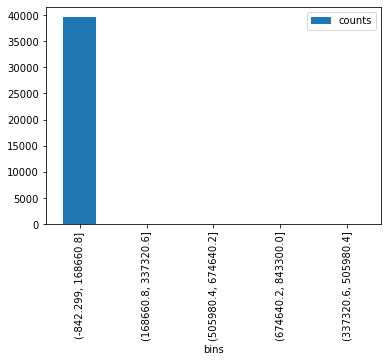

In [33]:
cut.plot.bar(x = 'bins', y = 'counts')

### Using KBinsDiscretizer for discretizing the Target

array([array([-5.19933758, -3.11960255, -1.03986752,  1.03986752,  3.11960255,
               5.19933758])                                                   ],
      dtype=object)

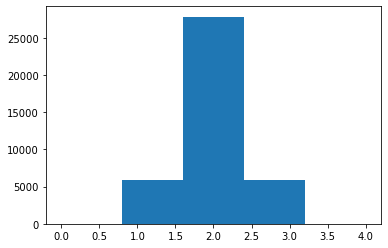

In [34]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data_trans_uniform = kbins.fit_transform(y_normalized)
plt.hist(data_trans_uniform, bins=5)
data_trans_uniform
kbins.bin_edges_

array([array([-5.19933758, -1.32028552, -0.45825879,  0.34050757,  1.2312985 ,
               5.19933758])                                                   ],
      dtype=object)

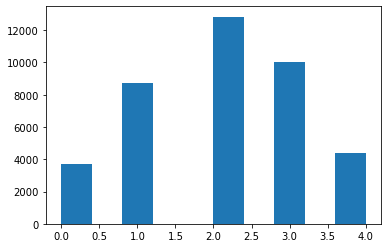

In [35]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_trans_kmeans = kbins.fit_transform(y_normalized)
plt.hist(data_trans_kmeans, bins=10)
data_trans_kmeans
kbins.bin_edges_

array([array([-5.19933758, -0.84162156, -0.26008943,  0.26658359,  0.84090635,
               5.19933758])                                                   ],
      dtype=object)

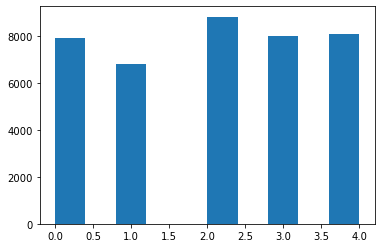

In [36]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data_trans_quantile = kbins.fit_transform(y_normalized)
plt.hist(data_trans_quantile, bins=10)
kbins.bin_edges_

In [37]:
y_cut = pd.DataFrame(cut, columns=['Class'])
y

shares
0         593
1         711
2        1500
3        1200
4         505
...       ...
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300

[39644 rows x 1 columns]

In [38]:
y_uniform = pd.DataFrame(data_trans_uniform, columns=['Class'])
y_uniform

Class
0        1.0
1        1.0
2        2.0
3        2.0
4        1.0
...      ...
39639    2.0
39640    2.0
39641    2.0
39642    2.0
39643    2.0

[39644 rows x 1 columns]

In [39]:
y_quantile = pd.DataFrame(data_trans_quantile, columns=['Class'])
y_quantile

Class
0        0.0
1        0.0
2        2.0
3        2.0
4        0.0
...      ...
39639    3.0
39640    3.0
39641    3.0
39642    1.0
39643    2.0

[39644 rows x 1 columns]

In [40]:
y_quantile['Class'].unique()

array([0., 2., 1., 4., 3.])

In [41]:
y_kmeans = pd.DataFrame(data_trans_kmeans, columns=['Class'])
y_kmeans

Class
0        0.0
1        1.0
2        2.0
3        2.0
4        0.0
...      ...
39639    2.0
39640    2.0
39641    2.0
39642    2.0
39643    2.0

[39644 rows x 1 columns]

After discritizing the data using different strategies, we will try evey discritization to see which performs better and fits the data.

## Splitting the Data

We will now split the data into training and testing using the normalized data.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_uniform, test_size=0.3, random_state=42)

<AxesSubplot:>

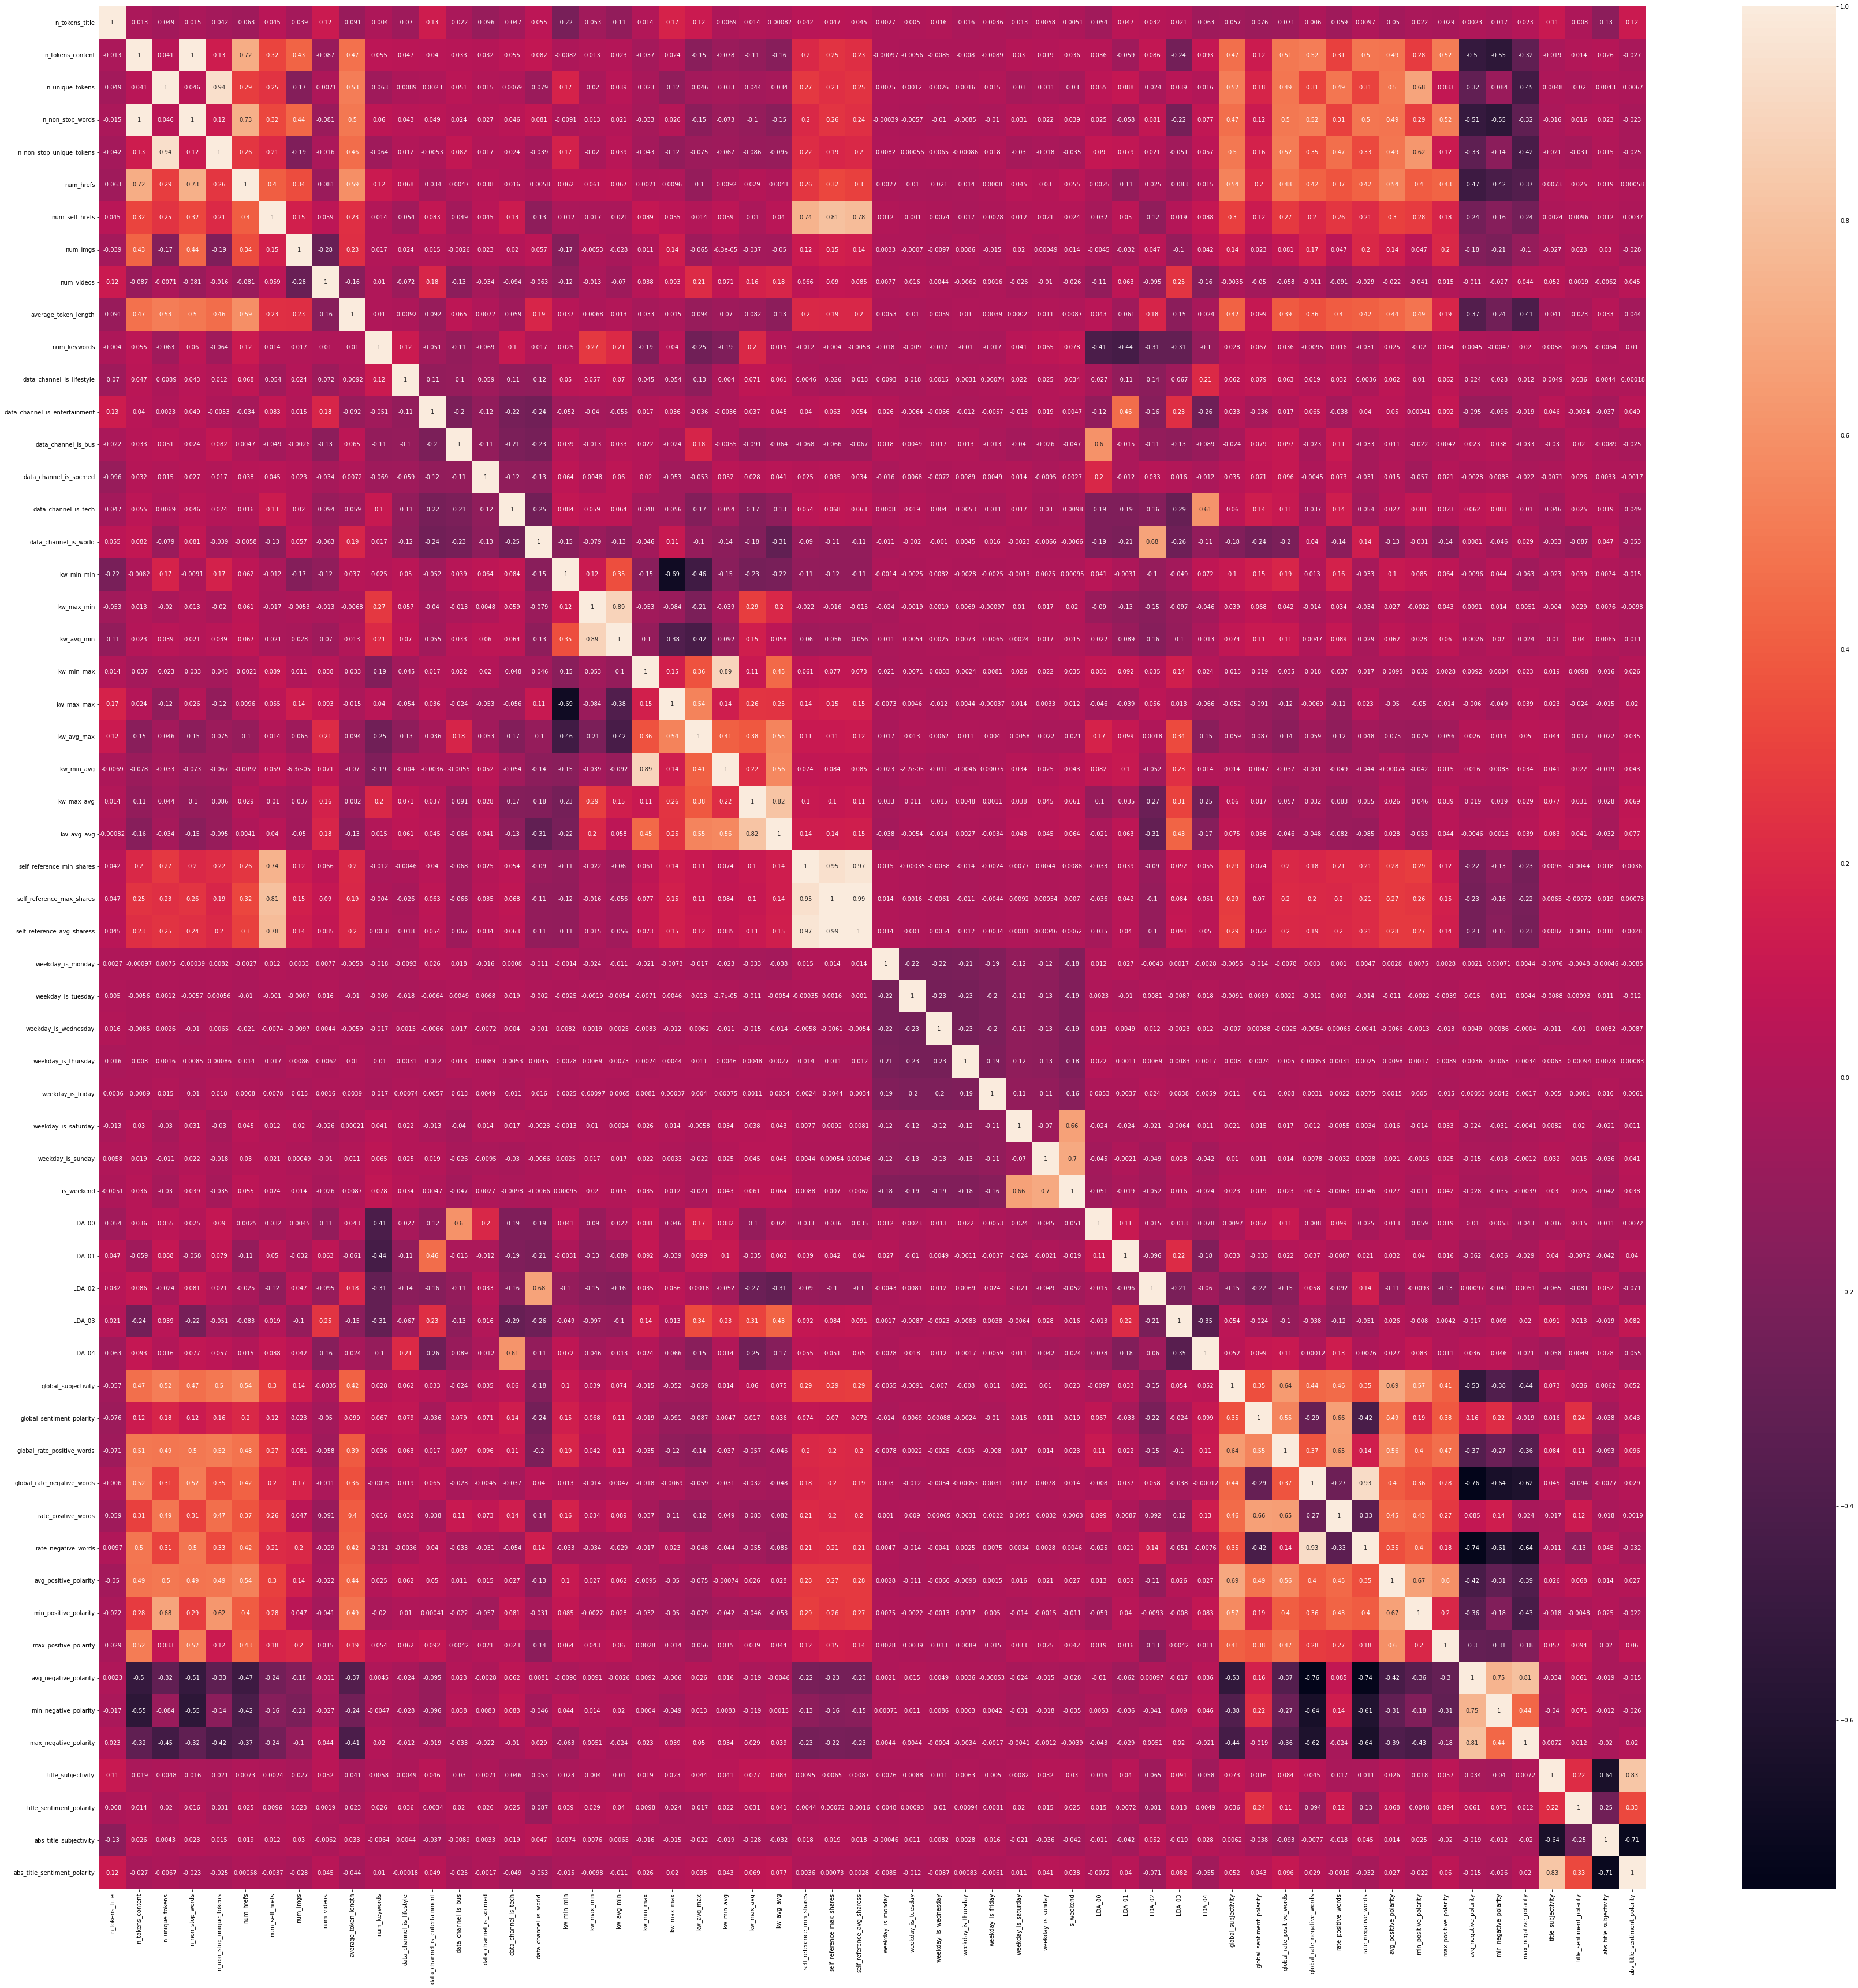

In [32]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(60,60)
sns.heatmap(corrmat, annot=True,ax=ax)


#import statsmodels.api as sm
#correlation= X_train.corr()
#N, M = 11, 11
#fig, ax = plt.subplots(figsize=(N, M))
#sm.graphics.plot_corr(correlation, xnames=list(correlation.columns), cmap='seismic', ax=ax,)
#plt.show()

<AxesSubplot:>

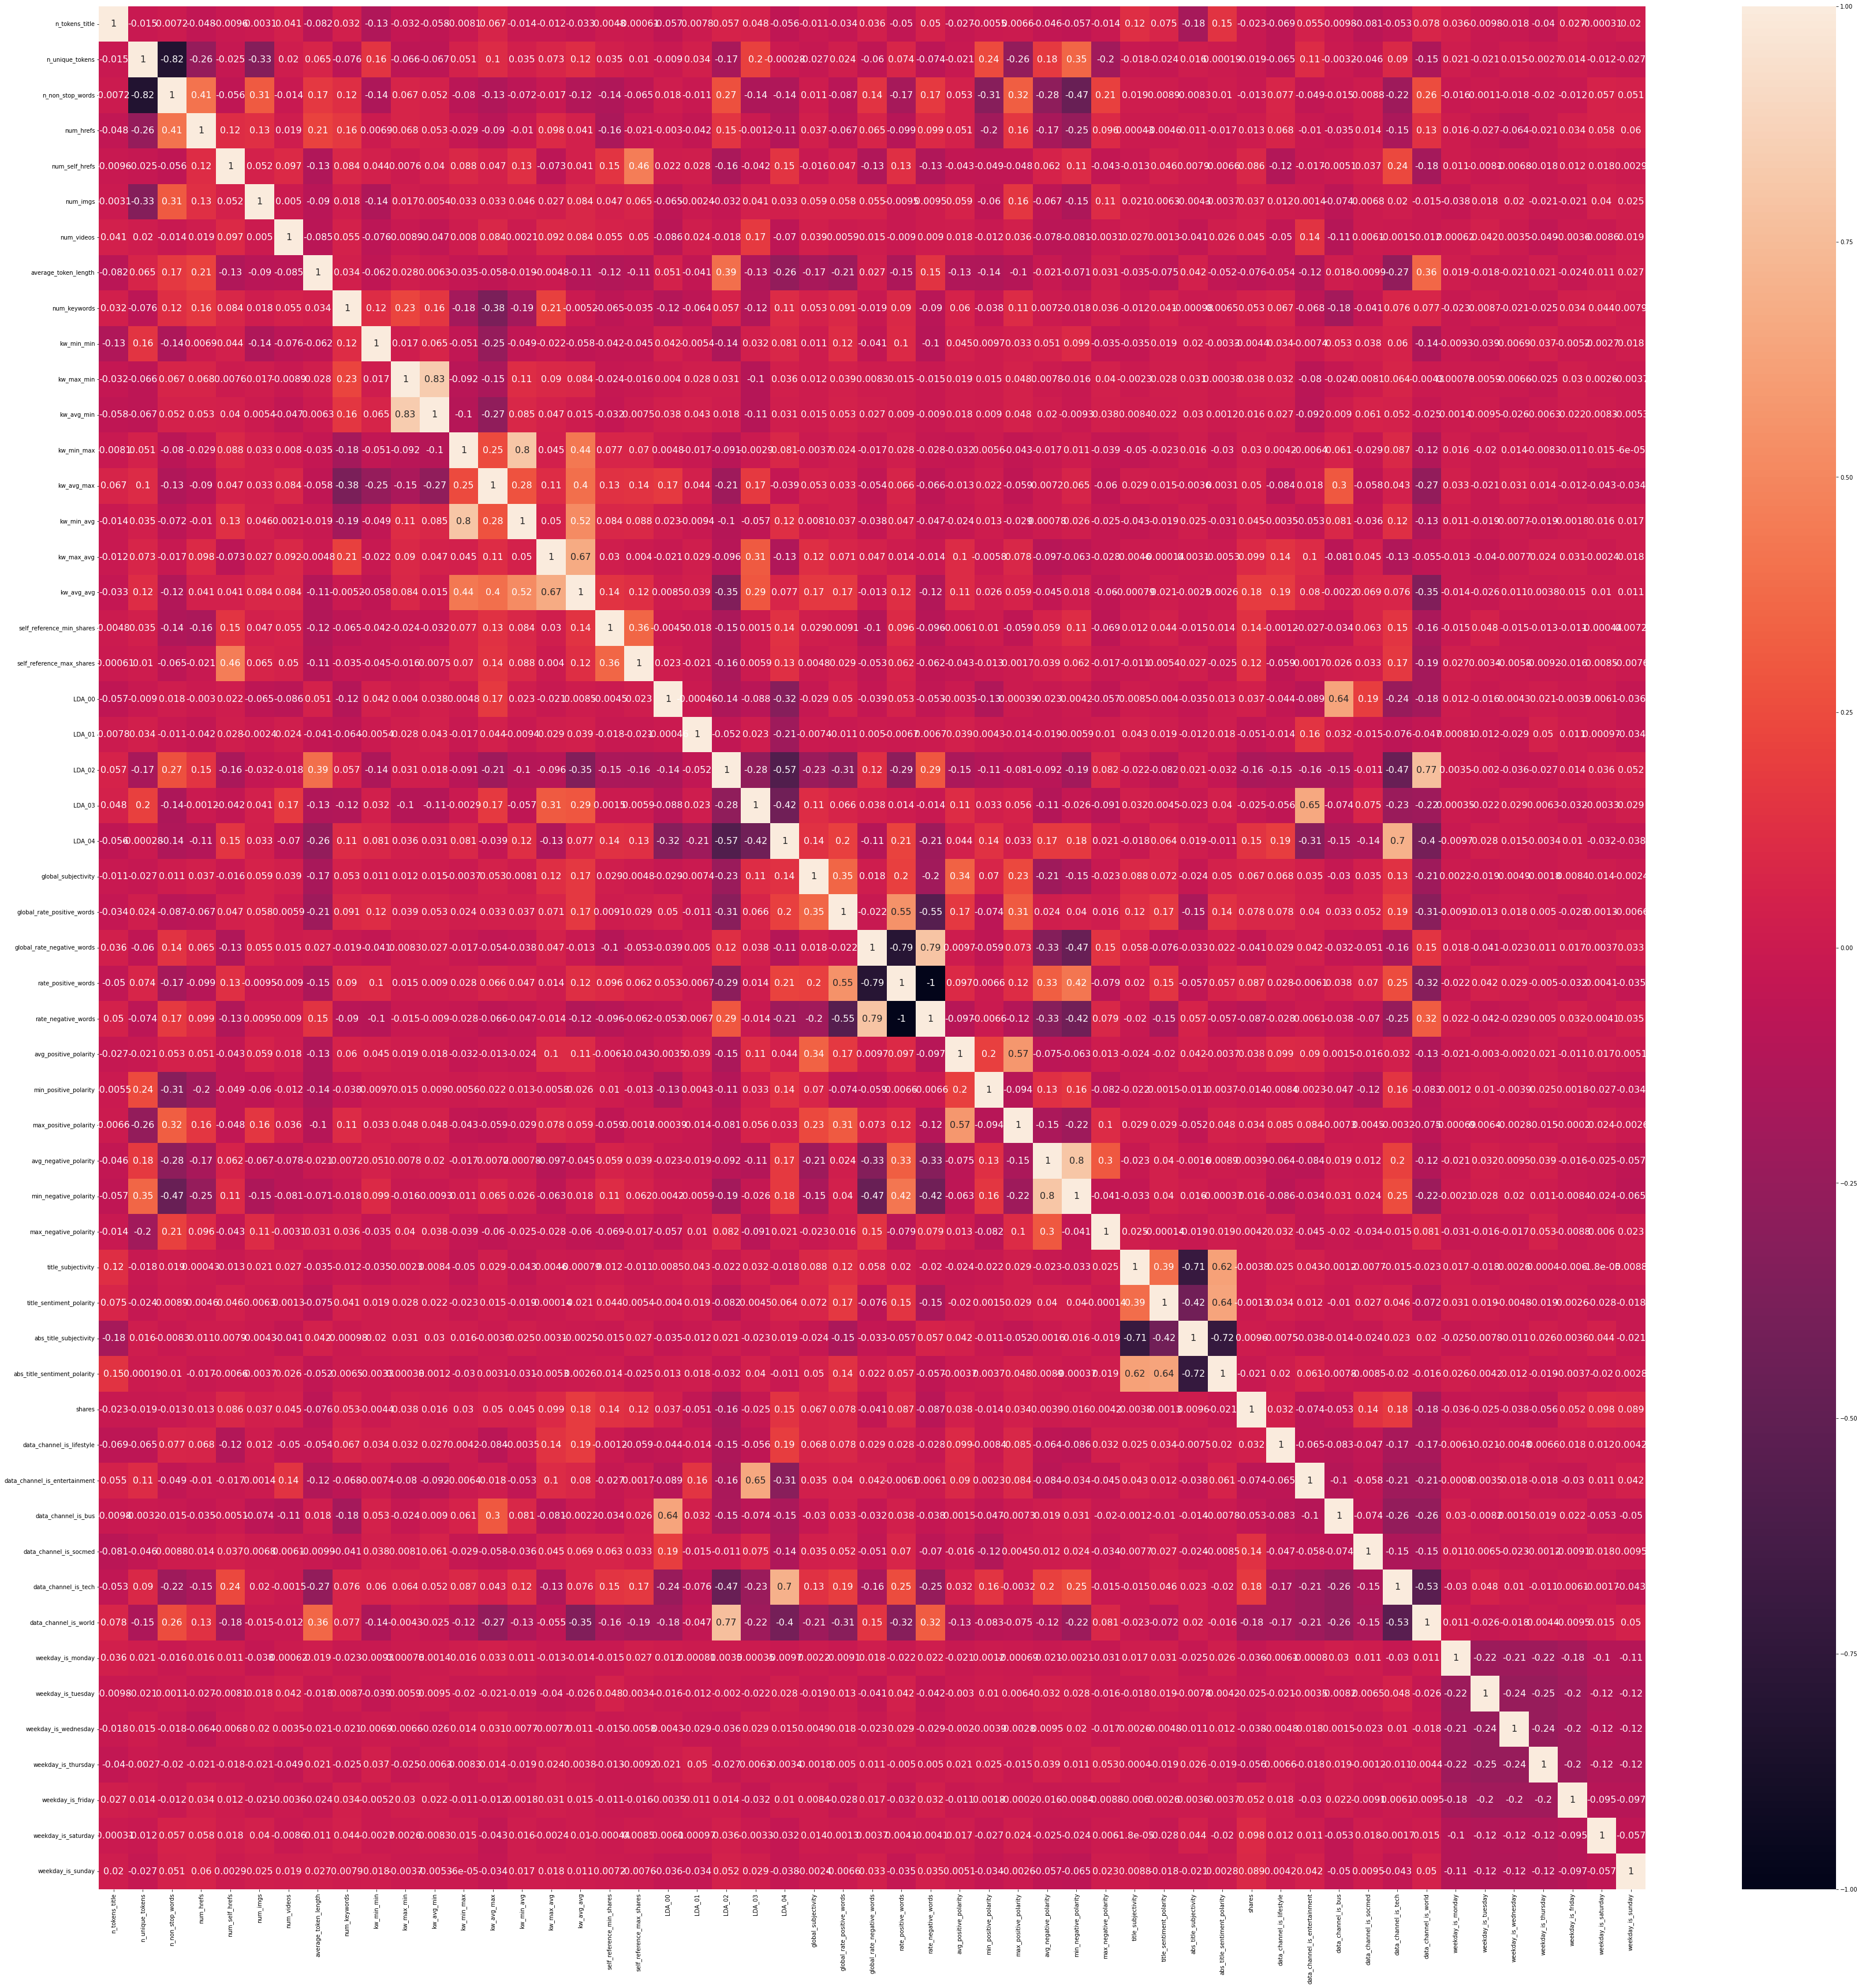

In [43]:
X_train.drop(columns=[ 'n_tokens_content', 'n_non_stop_unique_tokens','global_sentiment_polarity','self_reference_avg_sharess','kw_max_max'], inplace = True)
X_test.drop(columns=[ 'n_tokens_content', 'n_non_stop_unique_tokens','global_sentiment_polarity','self_reference_avg_sharess','kw_max_max'], inplace = True)

corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(60,60)
sns.heatmap(corrmat, annot=True,annot_kws={'size': 16})

In [95]:
X_train

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
6286        -0.628724          0.724973        -0.402342          0.702315   
36285        0.746351          0.504922        -0.349150          0.500651   
12083        1.639539          0.218773         0.418004          0.253606   
7859        -0.158740         -1.482760         2.484327         -1.387908   
12702        0.299230         -0.721714         0.675225         -0.756333   
...               ...               ...              ...               ...   
6265        -1.114032         -1.497997         1.669983         -1.533612   
11284        0.299230         -0.835558         0.822542         -0.692715   
38158        0.299230         -1.135284         1.196789         -1.152175   
860         -1.620592         -1.744448         2.855385         -1.611333   
15795       -0.158740         -0.454249         1.312844         -0.341493   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
6286                  -0.008782   0.207223       -5.199338 -5.199338   
36285                 -0.160912  -0.504922        0.592444  0.886449   
12083                  0.906442   0.207223       -5.199338 -0.240671   
7859                   2.000212  -0.773140        0.207223 -5.199338   
12702                  0.858910  -0.504922        0.207223 -0.240671   
...                         ...        ...             ...       ...   
6265                   1.665848  -1.081940       -5.199338 -5.199338   
11284                  0.285004   0.707140       -0.248427  0.955471   
38158                  0.894749  -0.504922        0.207223  0.441766   
860                    2.352270  -0.773140        0.207223 -5.199338   
15795                  1.027993   0.207223        0.592444 -0.240671   

       num_videos  average_token_length  ...  avg_positive_polarity  \
6286     0.676854              0.008782  ...               0.835265   
36285   -5.199338              0.189192  ...               0.017112   
12083   -5.199338              0.011878  ...               1.027898   
7859     0.676854              1.395952  ...               1.615945   
12702   -5.199338              0.330098  ...               1.259774   
...           ...                   ...  ...                    ...   
6265     0.676854              0.754088  ...              -0.080441   
11284   -5.199338              0.331862  ...               1.722417   
38158   -5.199338              0.100204  ...              -0.022546   
860      1.269664             -1.217839  ...               0.358771   
15795   -5.199338              1.640926  ...               1.521525   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
6286                0.247134               0.025094               0.051232   
36285               0.247134               5.199338               0.180047   
12083               0.247134               5.199338              -0.536531   
7859                2.611712              -1.044409              -1.442543   
12702               0.247134               0.025094              -0.574595   
...                      ...                    ...                    ...   
6265                1.365257              -0.561327               5.199338   
11284               1.831224               5.199338               1.053106   
38158               1.716415              -1.044409               1.374880   
860                 0.247134              -1.044409               0.532190   
15795              -0.602943               0.025094              -0.797320   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
6286               -0.308427               0.163824            1.431971   
36285              -0.583496              -0.123259           -0.042668   
12083               0.032625              -0.605955            1.176890   
7859                0.257495              -2.144011            1.012474   
12702               0.032625            

Trial to discritized none normalized targets to test for performance against normalized ones.

array([array([1.000e+00, 8.706e+02, 1.200e+03, 1.800e+03, 3.400e+03, 8.433e+05])],
      dtype=object)

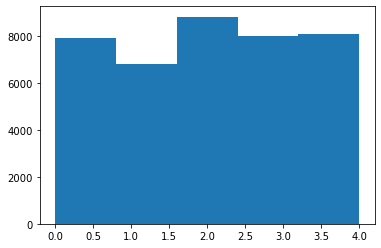

In [50]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data_trans_quantile1 = kbins.fit_transform(y)
plt.hist(data_trans_quantile1, bins=5)
data_trans_quantile1
kbins.bin_edges_

In [51]:
y_quantile1 = pd.DataFrame(data_trans_quantile1, columns=['Class'])
y_quantile1

Class
0        0.0
1        0.0
2        2.0
3        2.0
4        0.0
...      ...
39639    3.0
39640    3.0
39641    3.0
39642    1.0
39643    2.0

[39644 rows x 1 columns]

Splitting the non-normalized data

In [52]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_quantile1, test_size=0.3, random_state=42)


## Training The Classification Models

### Model (1): Decision Trees

#### Training without Feature selection

In [146]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
max_depth = [10,20,30,40,50]
scores=[]
for depth in max_depth:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train1, y_train1)
    y_pred1 = tree.predict(X_test1)
    scores.append(metrics.accuracy_score(y_test1, y_pred1))

plt.plot(max_depth, scores)

We will try setting the max depth from one to ten and see which gets the higher score, then this will be our final model.

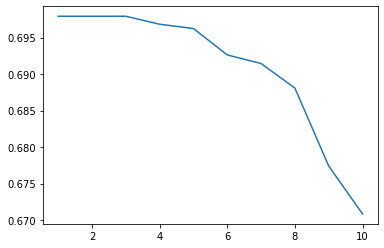

In [40]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
scores=[]
for depth in max_depth:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(max_depth, scores)

As seen above, around 5, That has the best testing accuracy. 

In [45]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.705
Accuracy on test set: 0.696


As seen above, the training acuracy is 70.5% while the testing accuracy is 69.6%

### Plotting the learning curve

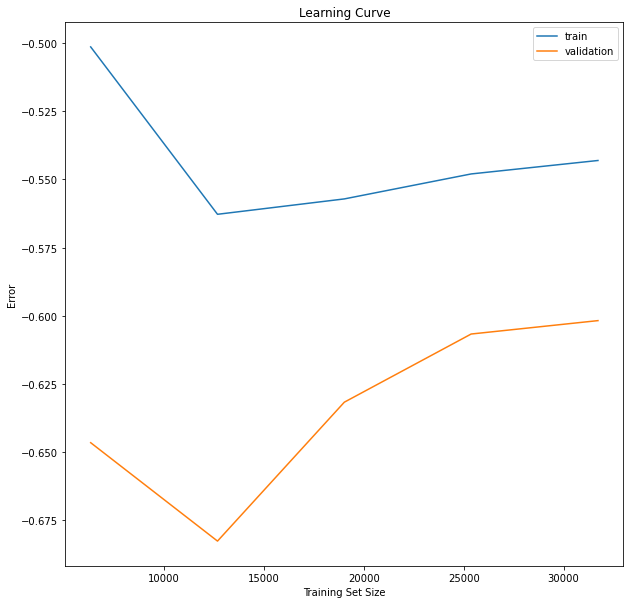

In [42]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree,
    X=X_normalized,
    y=y_uniform,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

test_mean = test_scores.mean(axis=1)
test_std = test_scores.std (axis=1)

plt.subplots(figsize=(10,10))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")


plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

The learning curve shows the result of the training and validation.

### Plotting Confusion Matrix

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


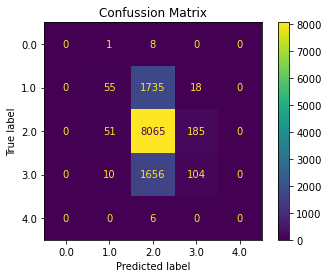

In [43]:
plot_confusion_matrix(tree, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

Plotting Classification report

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.47      0.03      0.06      1808
         2.0       0.70      0.97      0.82      8301
         3.0       0.34      0.06      0.10      1770
         4.0       0.00      0.00      0.00         6

    accuracy                           0.69     11894
   macro avg       0.30      0.21      0.19     11894
weighted avg       0.61      0.69      0.59     11894



c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Training with Feature selection

We will try the forward and Backward feature selection and look at the results of both to see which selected features best with higher accuracy.

In [46]:
sfs = SFS(tree,
         k_features = (1, 20),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

avgF = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avgF = avgF[["feature_idx","avg_score"]]
avgF

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    5.2s finished

[2022-11-12 09:30:48] Features: 1/20 -- score: 0.7045045029695876[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.7s finished

[2022-11-12 09:30:49] Features: 2/20 -- score: 0.7045765802364177[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.9s finished

[2022-11-12 09:30:50] Features: 3/20 -- score: 0.7045765802364177[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.0s finished

[2022-11-12 09:30:51] Featu

feature_idx avg_score
1                                               (10,)  0.704505
2                                            (10, 33)  0.704577
3                                        (10, 29, 33)  0.704577
4                                    (10, 29, 32, 33)  0.704577
5                                (10, 29, 32, 33, 34)  0.704577
6                            (10, 29, 30, 32, 33, 34)  0.704577
7                        (10, 29, 30, 31, 32, 33, 34)  0.704577
8                    (10, 29, 30, 31, 32, 33, 34, 36)  0.704505
9                (10, 29, 30, 31, 32, 33, 34, 35, 36)  0.704505
10           (10, 15, 29, 30, 31, 32, 33, 34, 35, 36)  0.704505
11        (8, 10, 15, 29, 30, 31, 32, 33, 34, 35, 36)  0.704577
12    (8, 10, 13, 15, 29, 30, 31, 32, 33, 34, 35, 36)  0.704649
13  (8, 10, 13, 14, 15, 29, 30, 31, 32, 33, 34, 35...  0.704649
14  (8, 10, 11, 13, 14, 15, 29, 30, 31, 32, 33, 34...  0.704649
15  (8, 10, 11, 12, 13, 14, 15, 29, 30, 31, 32, 33...  0.704649
16  (8, 10, 11, 12, 13, 14, 15, 29, 30, 31, 32, 33...  0.704541
17  (8, 10, 11, 12, 13, 14, 15, 29, 30, 31, 32, 33...  0.704541
18  (8, 10, 11, 12, 13, 14, 15, 29, 30, 31, 32, 33...  0.704504
19  (8, 10, 11, 12, 13, 14, 15, 21, 29, 30, 31, 32...  0.704505
20  (8, 10, 11, 12, 13, 14, 15, 21, 29, 30, 31, 32...  0.704468

In [46]:
sfs = SFS(tree,
         k_features = (1, 20),
          forward= False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

avgB = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avgB = avgB[["feature_idx","avg_score"]]
avgB

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   42.9s finished

[2022-11-12 00:52:18] Features: 57/1 -- score: 0.6970810847019876[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   40.1s finished

[2022-11-12 00:52:58] Features: 56/1 -- score: 0.697837921975621[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   36.8s finished

[2022-11-12 00:53:35] Features: 55/1 -- score: 0.6983423953164446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  55 out of

feature_idx avg_score
58  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.694955
57  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.697081
56  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.697838
55  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.698342
54  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.698703
53  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.699351
52  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  0.699856
51  (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.700108
50  (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.700252
49  (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.700469
48  (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.700433
47  (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.700685
46  (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.700901
45  (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.701153
44  (1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...  0.700973
43  (1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...  0.701081
42  (1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16,...  0.701153
41  (1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16,...  0.701261
40  (1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16,...  0.701442
39  (1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16,...  0.701297
38  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 17,...  0.701153
37  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 17,...  0.701333
36  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 17,...  0.701261
35  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 17,...  0.701225
34  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 17,...  0.701297
33  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 17,...  0.701333
32  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 18,...  0.701405
31  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 18,...  0.701478
30  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, 18,...   0.70191
29  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 18, 20,...  0.701694
28  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 18, 20,...   0.70191
27  (1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 15, 18, 20,...  0.702126
26  (1, 2, 4, 5, 6, 9, 10, 12, 13, 15, 18, 20, 21,...  0.702523
25  (1, 2, 4, 5, 6, 9, 10, 12, 15, 18, 20, 21, 24,...  0.702306
24  (1, 2, 4, 5, 6, 9, 10, 12, 15, 18, 20, 21, 24,...  0.702559
23  (1, 2, 4, 5, 6, 9, 10, 12, 15, 18, 20, 21, 24,...  0.702378
22  (1, 2, 4, 5, 6, 10, 12, 15, 18, 20, 21, 24, 25...  0.702342
21  (1, 2, 4, 5, 6, 10, 12, 15, 18, 20, 21, 24, 25...  0.702054
20  (1, 2, 4, 5, 10, 12, 15, 18, 20, 21, 24, 25, 2...  0.702054
19  (1, 2, 4, 5, 12, 15, 18, 20, 21, 24, 25, 26, 2...  0.702054
18  (1, 2, 4, 5, 12, 15, 18, 20, 21, 24, 25, 26, 2...  0.701838
17  (1, 2, 4, 5, 12, 15, 18, 20, 21, 24, 25, 26, 2...  0.702018
16  (1, 4, 5, 12, 15, 18, 20, 21, 24, 25, 26, 28, ...   0.70191
15  (1, 4, 5, 12, 15, 18, 20, 21, 24, 25, 26, 28, ...  0.701586
14  (4, 5, 12, 15, 18, 20, 21, 24, 25, 26, 28, 35,...  0.701225
13  (4, 5, 12, 15, 18, 20, 21, 24, 25, 26, 35, 37,...  0.701333
12     (4, 5, 12, 15, 18, 20, 21, 24, 25, 26, 35, 37)  0.701189
11         (4, 5, 15, 18, 20, 21, 24, 25, 26, 35, 37)  0.701009
10             (4, 5, 15, 18, 20, 21, 24, 25, 26, 37)       0.7
9                  (4, 5, 15, 20, 21, 24, 25, 26, 37)  0.699712
8                      (4, 5, 15, 20, 21, 24, 25, 37)  0.699568
7                          (4, 5, 15, 20, 21, 24, 25)  0.700216
6                              (4, 5, 15, 21, 24, 25)  0.701297
5                                 (5, 15, 21, 24, 25)  0.700288
4                                     (5, 15, 21, 24)  0.702018
3                                         (5, 15, 21)   0.70364
2                                             (5, 15)     0.704
1                                               (15,)  0.704505

It is seen that the FFS performed better as it showed higher accuracies than the BFS. So we will be plotting the best accuracy from the table of the FFS.

In [71]:
#print(avg[avg['avg_score']==avg['avg_score'].max()].index.values[0])
avgF.iloc[avgF[avgF['avg_score']==avgF['avg_score'].max()].index.values[0]][0]


(8, 10, 11, 13, 14, 15, 29, 30, 31, 32, 33, 34, 35, 36)

In [72]:
avg_l = list(avgF.iloc[avgF[avgF['avg_score']==avgF['avg_score'].max()].index.values[0]][0])
cols=[]
for i in range(len(avg_l)):
        cols.append(df.columns[avg_l[i]])

f_df = pd.DataFrame(data=df_trans[cols])
f_df

num_videos  num_keywords  data_channel_is_lifestyle  \
0       -5.199338     -1.077446                  -5.199338   
1       -5.199338     -1.654145                  -5.199338   
2       -5.199338     -0.561327                  -5.199338   
3       -5.199338     -0.086674                  -5.199338   
4       -5.199338     -0.086674                  -5.199338   
...           ...           ...                        ...   
39639    0.676854      0.344154                  -5.199338   
39640    3.099208     -0.086674                  -5.199338   
39641    0.676854      0.344154                  -5.199338   
39642   -5.199338     -1.077446                  -5.199338   
39643    1.269664     -1.654145                  -5.199338   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0                -5.199338               -5.199338             -5.199338   
1                 5.199338               -5.199338             -5.199338   
2                 5.199338               -5.199338             -5.199338   
3                -5.199338               -5.199338             -5.199338   
4                -5.199338               -5.199338              5.199338   
...                    ...                     ...                   ...   
39639            -5.199338               -5.199338              5.199338   
39640            -5.199338                5.199338             -5.199338   
39641            -5.199338               -5.199338             -5.199338   
39642            -5.199338               -5.199338             -5.199338   
39643            -5.199338               -5.199338             -5.199338   

       weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  \
0               5.199338           -5.199338             -5.199338   
1               5.199338           -5.199338             -5.199338   
2               5.199338           -5.199338             -5.199338   
3               5.199338           -5.199338             -5.199338   
4               5.199338           -5.199338             -5.199338   
...                  ...                 ...                   ...   
39639          -5.199338           -5.199338              5.199338   
39640          -5.199338           -5.199338              5.199338   
39641          -5.199338           -5.199338              5.199338   
39642          -5.199338           -5.199338              5.199338   
39643          -5.199338           -5.199338              5.199338   

       weekday_is_thursday  weekday_is_friday  weekday_is_saturday  \
0                -5.199338          -5.199338            -5.199338   
1                -5.199338          -5.199338            -5.199338   
2                -5.199338          -5.199338            -5.199338   
3                -5.199338          -5.199338            -5.199338   
4                -5.199338          -5.199338            -5.199338   
...                    ...                ...                  ...   
39639            -5.199338          -5.199338            -5.199338   
39640            -5.199338          -5.199338            -5.199338   
39641            -5.199338          -5.199338            -5.199338   
39642            -5.199338          -5.199338            -5.199338   
39643            -5.199338          -5.199338            -5.199338   

       weekday_is_sunday  is_weekend  
0              -5.199338   -5.199338  
1              -5.199338   -5.199338  
2              -5.199338   -5.199338  
3              -5.199338   -5.199338  
4              -5.199338   -5.199338  
...                  ...         ...  
39639          -5.199338   -5.199338  
39640          -5.199338   -5.199338  
39641          -5.199338   -5.199338  
39642          -5.199338   -5.199338  
39643          -5.199338   -5.199338  

[39644 rows x 14 columns]

In [73]:
fX_train, fX_test, fy_train, fy_test = train_test_split(f_df, y_uniform, test_size=0.3, random_state=42)
ftree = DecisionTreeClassifier(max_depth=7, random_state=0)
ftree.fit(fX_train, fy_train)
fy_pred = tree.predict(fX_test)
print("Accuracy on training set: {:.3f}".format(tree.score(fX_train, fy_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(fX_test, fy_test)))

Accuracy on training set: 0.705
Accuracy on test set: 0.696


As seen above, it has given same Testing accuracy without the feature selection. Which means that we can use only 14 fetures and still get the same results. THerefore, the feature selection succeeded in reducing the features that can be used.

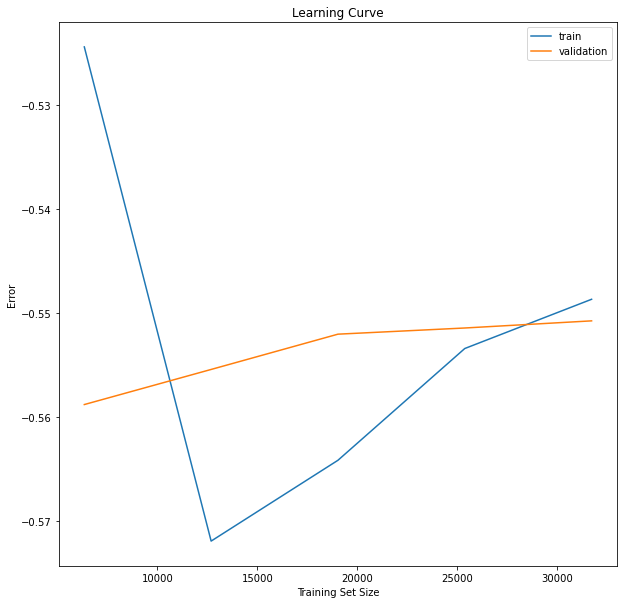

In [74]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=ftree,
    X=f_df,
    y=y_uniform,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

test_mean = test_scores.mean(axis=1)
test_std = test_scores.std (axis=1)

plt.subplots(figsize=(10,10))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")


plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

Due to Comutational limitations the Exhausitve fature selection did not excute.

In [100]:
efs = EFS(tree,
         min_features= 4,
          max_features= 20,
          scoring='accuracy',
          cv = None,
          #n_jobs=-1
         ).fit(X_train, y_train)

KeyboardInterrupt: 

### Model (2): KNN

#### Training without Feature selection

We will try different neighbours and metrics to decide which one provides the best Accuracy.

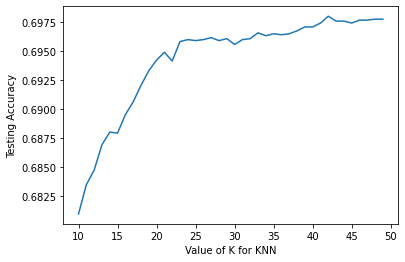

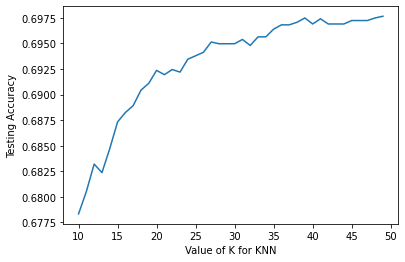

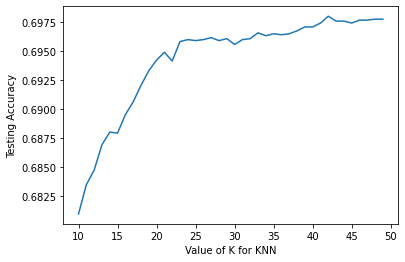

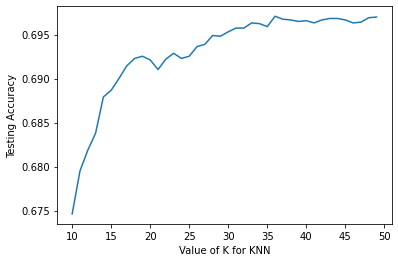

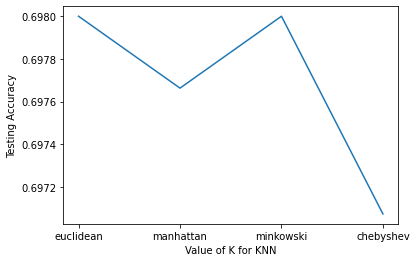

In [96]:
k_range = range(10, 50)
k_Metric = ['euclidean','manhattan','minkowski','chebyshev']
global_scores=[]
for kmetric in k_Metric:
    scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k,metric=kmetric)
        knn.fit(X_train, y_train.values.ravel())
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
    plt.plot(k_range, scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Testing Accuracy')
    plt.show()
    global_scores.append(max(scores))
plt.plot(k_Metric, global_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

As seen above, the best Metric to use is the minkowski Metric. Looking back st its graoh, we will find thst the best number of neighbours to chose is 35.

In [28]:
knn = KNeighborsClassifier(n_neighbors=35,metric='minkowski')
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.705
Accuracy on test set: 0.696


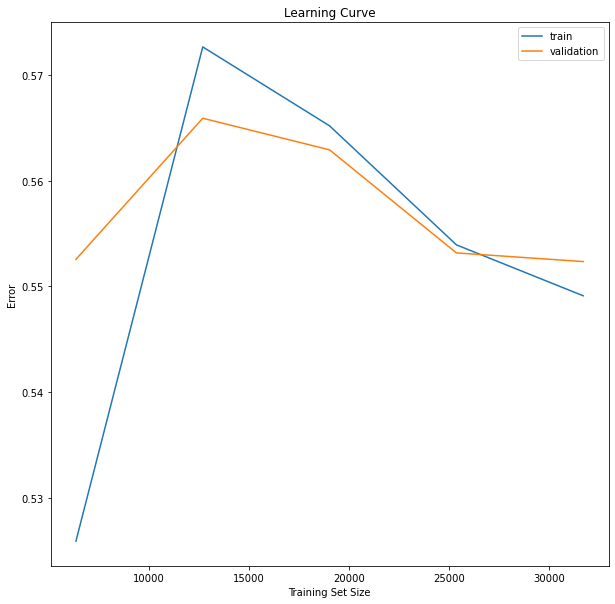

In [77]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X_normalized,
    y=y_uniform.values.ravel(),
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

test_mean = test_scores.mean(axis=1)
test_std = test_scores.std (axis=1)

plt.subplots(figsize=(10,10))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")


plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


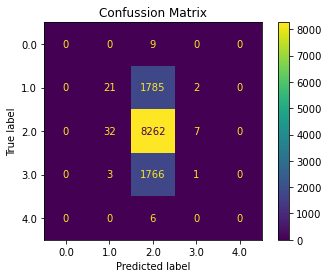

In [78]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.38      0.01      0.02      1808
         2.0       0.70      1.00      0.82      8301
         3.0       0.10      0.00      0.00      1770
         4.0       0.00      0.00      0.00         6

    accuracy                           0.70     11894
   macro avg       0.23      0.20      0.17     11894
weighted avg       0.56      0.70      0.58     11894



c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Training with Feature selection

In [30]:
sfs = SFS(knn,
         k_features = (1, 20),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

avgF = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avgF = avgF[["feature_idx","avg_score"]]
avgF

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   47.6s finished

[2022-11-12 11:49:07] Features: 1/20 -- score: 0.7045405416030026[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   19.8s finished

[2022-11-12 11:49:28] Features: 2/20 -- score: 0.7045405312142354[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   25.5s finished

[2022-11-12 11:49:53] Features: 3/20 -- score: 0.7045405467973862[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  55 out o

feature_idx avg_score
1                                                (3,)  0.704541
2                                             (3, 20)  0.704541
3                                         (3, 15, 20)  0.704541
4                                     (3, 15, 20, 34)  0.704541
5                                 (3, 15, 16, 20, 34)  0.704469
6                              (3, 9, 15, 16, 20, 34)  0.704505
7                           (1, 3, 9, 15, 16, 20, 34)  0.704649
8                       (1, 3, 9, 11, 15, 16, 20, 34)  0.704577
9                   (1, 3, 9, 11, 13, 15, 16, 20, 34)  0.704541
10              (1, 3, 9, 11, 13, 15, 16, 20, 31, 34)  0.704577
11          (1, 3, 9, 11, 13, 15, 16, 20, 21, 31, 34)  0.704432
12      (1, 3, 9, 11, 13, 15, 16, 19, 20, 21, 31, 34)  0.704432
13   (1, 3, 4, 9, 11, 13, 15, 16, 19, 20, 21, 31, 34)  0.704505
14  (1, 3, 4, 9, 11, 13, 15, 16, 19, 20, 21, 31, 3...  0.704685
15  (1, 3, 4, 9, 11, 13, 15, 16, 19, 20, 21, 31, 3...  0.704685
16  (1, 3, 4, 9, 11, 13, 15, 16, 19, 20, 21, 31, 3...  0.704685
17  (1, 3, 4, 9, 11, 13, 14, 15, 16, 19, 20, 21, 3...  0.704613
18  (1, 3, 4, 9, 11, 13, 14, 15, 16, 19, 20, 21, 3...   0.70436
19  (1, 3, 4, 9, 11, 13, 14, 15, 16, 19, 20, 21, 3...  0.704504
20  (1, 3, 4, 9, 11, 13, 14, 15, 16, 19, 20, 21, 3...  0.704396

In [31]:
sfs = SFS(knn,
         k_features = (1, 20),
          forward= False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train.values.ravel())

avgB = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avgB = avgB[["feature_idx","avg_score"]]
avgB

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:  2.1min finished

[2022-11-12 12:27:07] Features: 57/1 -- score: 0.7040360474846448[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  1.9min finished

[2022-11-12 12:29:01] Features: 56/1 -- score: 0.7044684695305562[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  1.6min finished

[2022-11-12 12:30:40] Features: 55/1 -- score: 0.7045765854308013[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done  55 out o

feature_idx avg_score
58  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.703568
57  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...  0.704036
56  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14,...  0.704468
55  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...  0.704577
54  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...  0.704649
53  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...  0.704649
52  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...  0.704685
51  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...  0.704865
50  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...  0.705009
49  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...  0.705081
48  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16...  0.705225
47  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16...  0.705261
46  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16...  0.705261
45  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16...  0.705225
44  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16...  0.705225
43  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16...  0.705297
42  (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 15, 16, 17...  0.705189
41  (0, 2, 3, 4, 5, 6, 7, 8, 10, 13, 15, 16, 17, 1...  0.705189
40  (0, 2, 3, 4, 5, 6, 7, 8, 10, 13, 16, 17, 19, 2...  0.705153
39  (0, 2, 3, 4, 5, 6, 7, 8, 10, 13, 16, 17, 19, 2...  0.705189
38  (0, 2, 3, 4, 5, 6, 7, 8, 10, 13, 16, 17, 19, 2...  0.705333
37  (0, 2, 3, 4, 5, 6, 7, 8, 10, 13, 16, 17, 19, 2...  0.705333
36  (0, 2, 3, 4, 5, 6, 7, 8, 10, 13, 16, 17, 19, 2...  0.705261
35  (0, 3, 4, 5, 6, 7, 8, 10, 13, 16, 17, 19, 20, ...  0.705225
34  (0, 3, 4, 5, 6, 7, 8, 10, 13, 16, 17, 19, 20, ...  0.705297
33  (0, 3, 4, 5, 6, 7, 8, 10, 13, 16, 17, 19, 20, ...  0.705261
32  (0, 3, 5, 6, 7, 8, 10, 13, 16, 17, 19, 20, 21,...  0.705333
31  (0, 5, 6, 7, 8, 10, 13, 16, 17, 19, 20, 21, 22...  0.705333
30  (0, 5, 6, 7, 8, 10, 13, 16, 17, 19, 20, 21, 22...  0.705297
29  (0, 5, 6, 7, 8, 10, 13, 16, 17, 19, 20, 21, 22...  0.705261
28  (0, 6, 7, 8, 10, 13, 16, 17, 19, 20, 21, 22, 2...  0.705189
27  (0, 6, 7, 8, 10, 13, 16, 17, 19, 20, 21, 26, 2...  0.705117
26  (0, 6, 7, 8, 10, 13, 16, 17, 20, 21, 26, 27, 2...  0.705045
25  (0, 6, 7, 8, 10, 13, 16, 17, 20, 21, 26, 27, 2...  0.705117
24  (0, 6, 7, 8, 10, 13, 16, 17, 20, 21, 26, 27, 2...  0.704901
23  (0, 6, 7, 8, 10, 13, 16, 17, 20, 21, 26, 27, 2...  0.704865
22  (0, 6, 7, 8, 10, 13, 16, 17, 20, 21, 26, 27, 2...  0.704829
21  (0, 6, 7, 8, 10, 13, 16, 17, 20, 21, 26, 27, 2...  0.704865
20  (0, 6, 7, 8, 10, 13, 16, 17, 20, 21, 27, 28, 2...  0.705009
19  (0, 6, 8, 10, 13, 16, 17, 20, 21, 27, 28, 29, ...  0.704901
18  (0, 6, 8, 10, 13, 16, 17, 20, 27, 28, 29, 30, ...  0.704937
17  (0, 6, 8, 10, 16, 17, 20, 27, 28, 29, 30, 33, ...  0.704901
16  (6, 8, 10, 16, 17, 20, 27, 28, 29, 30, 33, 36,...  0.704757
15  (6, 8, 10, 16, 17, 20, 28, 29, 30, 33, 36, 47,...  0.704793
14  (6, 8, 10, 16, 17, 20, 28, 30, 33, 36, 47, 50,...  0.704541
13  (6, 8, 10, 16, 17, 20, 28, 30, 33, 47, 50, 54,...  0.704793
12     (6, 8, 10, 16, 17, 20, 30, 33, 47, 50, 54, 56)  0.704613
11         (6, 8, 10, 16, 17, 20, 30, 33, 47, 50, 56)  0.704577
10             (6, 8, 10, 16, 17, 20, 30, 33, 50, 56)  0.704613
9                  (6, 8, 10, 16, 17, 20, 33, 50, 56)  0.704757
8                     (6, 10, 16, 17, 20, 33, 50, 56)  0.704577
7                         (6, 16, 17, 20, 33, 50, 56)   0.70436
6                             (6, 16, 17, 20, 33, 56)  0.704324
5                                 (6, 16, 17, 33, 56)   0.70436
4                                     (6, 16, 17, 56)  0.704793
3                                         (6, 16, 17)  0.704505
2                                            (16, 17)  0.704505
1                                               (17,)  0.583937

In this model, it is seen that the Backard feature selection produced hogh accuracy so we will use the set of features that has the highest accuracy.

In [32]:
avg_l = list(avgB.iloc[avgB[avgB['avg_score']==avgB['avg_score'].max()].index.values[0]][0])
cols=[]
for i in range(len(avg_l)):
        cols.append(df.columns[avg_l[i]])

f_df = pd.DataFrame(data=df_trans[cols])
f_df

n_tokens_title  num_self_hrefs  num_imgs  num_videos  num_keywords  \
0            0.746351       -0.248427 -0.240671   -5.199338     -1.077446   
1           -0.628724       -0.771450 -0.240671   -5.199338     -1.654145   
2           -0.628724       -0.771450 -0.240671   -5.199338     -0.561327   
3           -0.628724       -5.199338 -0.240671   -5.199338     -0.086674   
4            1.192071        2.256745  1.629992   -5.199338     -0.086674   
...               ...             ...       ...         ...           ...   
39639        0.299230        1.378114 -0.240671    0.676854      0.344154   
39640        0.746351        1.378114  0.593940    3.099208     -0.086674   
39641       -0.158740       -0.771450  1.159515    0.676854      0.344154   
39642       -2.156675       -0.771450 -0.240671   -5.199338     -1.077446   
39643       -0.158740       -0.771450 -5.199338    1.269664     -1.654145   

       data_channel_is_bus  data_channel_is_world  kw_min_min  kw_min_max  \
0                -5.199338              -5.199338    0.204660   -5.199338   
1                 5.199338              -5.199338    0.204660   -5.199338   
2                 5.199338              -5.199338    0.204660   -5.199338   
3                -5.199338              -5.199338    0.204660   -5.199338   
4                -5.199338              -5.199338    0.204660   -5.199338   
...                    ...                    ...         ...         ...   
39639            -5.199338              -5.199338   -5.199338    1.289578   
39640            -5.199338              -5.199338   -5.199338    0.582009   
39641            -5.199338              -5.199338   -5.199338    0.555462   
39642            -5.199338               5.199338   -5.199338   -5.199338   
39643            -5.199338              -5.199338   -5.199338    2.289988   

       kw_max_max  self_reference_max_shares  self_reference_avg_sharess  \
0       -5.199338                  -0.897425                   -0.895405   
1       -5.199338                  -5.199338                   -5.199338   
2       -5.199338                  -0.752997                   -0.722528   
3       -5.199338                  -5.199338                   -5.199338   
4       -5.199338                   1.144896                    0.293986   
...           ...                        ...                         ...   
39639    5.199338                   1.789017                    1.959979   
39640    5.199338                  -0.200818                   -0.045180   
39641    5.199338                  -0.483658                   -0.385726   
39642    5.199338                  -0.902798                   -0.901685   
39643    5.199338                  -0.200818                   -0.045180   

       weekday_is_monday  weekday_is_tuesday  weekday_is_friday  is_weekend  \
0               5.199338           -5.199338          -5.199338   -5.199338   
1               5.199338           -5.199338          -5.199338   -5.199338   
2               5.199338           -5.199338          -5.199338   -5.199338   
3               5.199338           -5.199338          -5.199338   -5.199338   
4               5.199338           -5.199338          -5.199338   -5.199338   
...                  ...                 ...                ...         ...   
39639          -5.199338           -5.199338          -5.199338   -5.199338   
39640          -5.199338           -5.199338          -5.199338   -5.199338   
39641          -5.199338           -5.199338          -5.199338   -5.199338   
39642          -5.199338           -5.199338          -5.199338   -5.199338   
39643          -5.199338           -5.199338          -5.199338   -5.199338   

       rate_negative_words  max_positive_polarity  title_subjectivity  \
0                -0.344154              -0.303168            0.680013   
1                -0.091712              -0.303168           -5.199338   
2                -0.977487               5.199338           -5.199338   
3  

In [42]:
bX_train, bX_test, by_train, by_test = train_test_split(f_df, y_uniform, test_size=0.3, random_state=42)

bknn = KNeighborsClassifier(n_neighbors=35,metric='minkowski')
bknn.fit(bX_train, by_train.values.ravel())
y_pred = knn.predict(bX_test)
print("Accuracy on training set: {:.3f}".format(knn.score(bX_train, by_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(bX_test, by_test)))

Accuracy on training set: 0.705
Accuracy on test set: 0.698


The percision below shows that there are two classes it will never perdict they may be caused because these classes had low number of records from the beginninng.

In [53]:
print(classification_report(by_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.43      0.01      0.02      1808
         2.0       0.70      1.00      0.82      8301
         3.0       0.50      0.00      0.00      1770
         4.0       0.00      0.00      0.00         6

    accuracy                           0.70     11894
   macro avg       0.33      0.20      0.17     11894
weighted avg       0.63      0.70      0.58     11894



c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The testing accuracy is 69.8% which is the same without the feature selection, but with almost half the number of features (20 features)

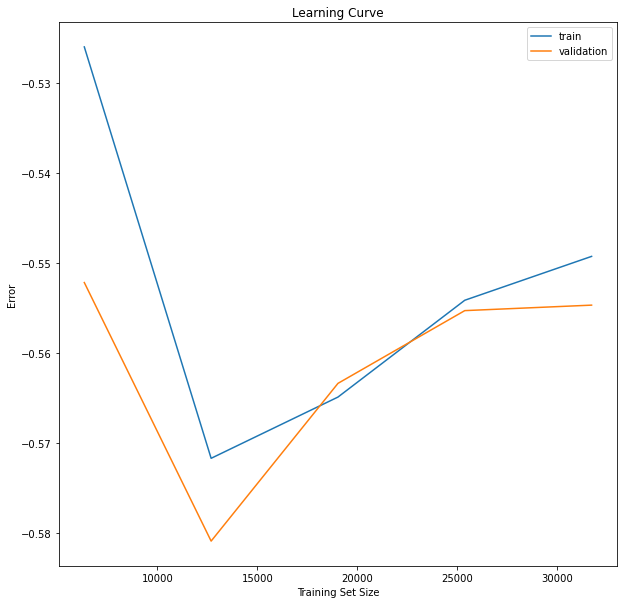

In [56]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=f_df,
    y=y_uniform.values.ravel(),
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

test_mean = test_scores.mean(axis=1)
test_std = test_scores.std (axis=1)

plt.subplots(figsize=(10,10))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")


plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

### Model (3): Logistic Regression

#### Training without Feature selection

In [44]:
penalty=[ 'l2', 'none']
for p in penalty:
    lr = LogisticRegression(penalty=p)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(lr.score(X_train, y_train)))
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Accuracy of logistic regression classifier on train set: 0.70
Accuracy of logistic regression classifier on test set: 0.70
Accuracy of logistic regression classifier on train set: 0.70
Accuracy of logistic regression classifier on test set: 0.70


c:\Users\Farah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

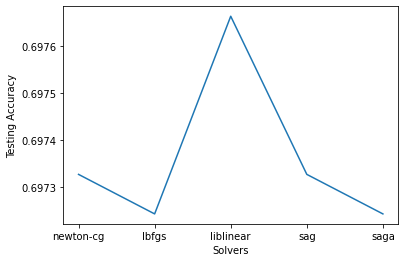

In [45]:
scores=[]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for s in solver:
    lr = LogisticRegression(solver=s)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores.append(lr.score(X_test, y_test))
    #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))
plt.plot(solver, scores)
plt.xlabel('Solvers')
plt.ylabel('Testing Accuracy')
plt.show()

In [43]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.70


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.43      0.01      0.02      1808
         2.0       0.70      1.00      0.82      8301
         3.0       0.50      0.00      0.00      1770
         4.0       0.00      0.00      0.00         6

    accuracy                           0.70     11894
   macro avg       0.33      0.20      0.17     11894
weighted avg       0.63      0.70      0.58     11894



c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


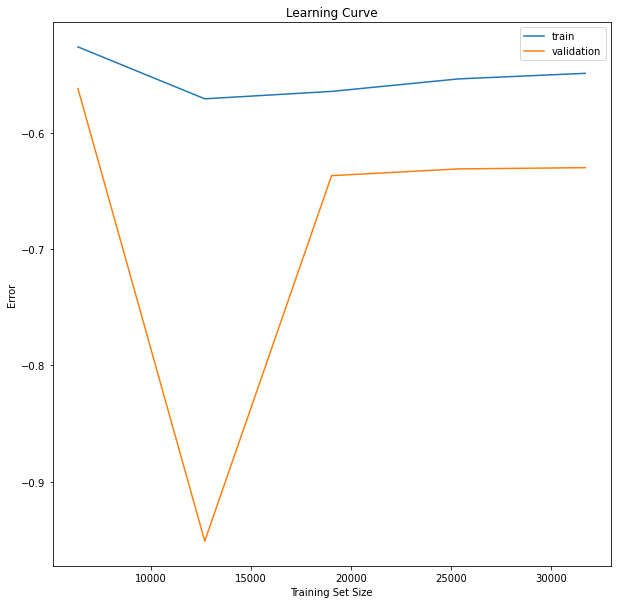

In [57]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lr,
    X=X_normalized,
    y=y_uniform.values.ravel(),
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

test_mean = test_scores.mean(axis=1)
test_std = test_scores.std (axis=1)

plt.subplots(figsize=(10,10))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")


plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

#### Training with Feature selection

In [59]:
sfs = SFS(lr,
         k_features = (1, 20),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

avg = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avg = avg[["feature_idx","avg_score"]]
avg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    9.5s finished

[2022-11-12 14:48:46] Features: 1/20 -- score: 0.7045045029695876[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    4.2s finished

[2022-11-12 14:48:50] Features: 2/20 -- score: 0.7045045029695876[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    7.3s finished

[2022-11-12 14:48:58] Features: 3/20 -- score: 0.7045045029695876[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  55 out o

feature_idx avg_score
1                                                (0,)  0.704505
2                                              (0, 1)  0.704505
3                                           (0, 1, 2)  0.704505
4                                        (0, 1, 2, 3)  0.704505
5                                     (0, 1, 2, 3, 9)  0.704541
6                                  (0, 1, 2, 3, 6, 9)  0.704541
7                               (0, 1, 2, 3, 6, 7, 9)  0.704541
8                            (0, 1, 2, 3, 6, 7, 8, 9)  0.704541
9                        (0, 1, 2, 3, 6, 7, 8, 9, 11)  0.704541
10                   (0, 1, 2, 3, 6, 7, 8, 9, 11, 12)  0.704541
11               (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12)  0.704541
12           (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13)  0.704541
13       (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14)  0.704541
14   (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)  0.704541
15  (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.704541
16  (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.704541
17  (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.704541
18  (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.704577
19  (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.704685
20  (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...  0.704721

In [60]:
sfs = SFS(lr,
         k_features = (1, 10),
          forward= False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train.values.ravel())

avgB = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avgB = avgB[["feature_idx","avg_score"]]
avgB

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed: 12.6min finished

[2022-11-12 15:24:52] Features: 57/1 -- score: 0.7047567837922599[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed: 12.3min finished

[2022-11-12 15:37:12] Features: 56/1 -- score: 0.7049730103983665[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed: 11.2min finished

[2022-11-12 15:48:22] Features: 55/1 -- score: 0.7050090490317815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

AttributeError: SequentialFeatureSelector has not been fitted, yet.

### Final Analysis

- As seen from the three models, all models produced almost the same accuracy level which was around 70%. The feature selection techniques in all models helped in cutting down the number of critical features and it showed that they produced the same accuracy. This shows that most of the features were not contributing to the model and only a few featire were suffcient. 
- The data was not normally distributed so it needed to get normalized. There were trials with non-normalized data and it overfit over the data that were askewed to one side of the curve. 
- The target feature was continuous so it was necessary to dicritize it into bins. The number of bins was calculated thorugh a trial and error method to find out the best accumlation of the records to provide a uniform distribution. A more calculated approach was then used (KBinsDiscretizer) using different strategies (kmeans, uniform, etc.) to find the best discrimination. 